In [1]:
# imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import matplotlib.gridspec as gridspec
#from sklearn.metrics import silhouette_score

result_dir = "../results/revision/analysis/"
plot_dir = "../results/revision/plots/"

batches = ["site1", "site2", "site3", "site4"]
stages = ["E7.5", "E7.75", "E8.0", "E8.5", "E8.75"]

cm = 1 / 2.54

/Users/dbm829/anaconda3/envs/multidgd-paper/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/dbm829/anaconda3/envs/multidgd-paper/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/dbm829/anaconda3/envs/multidgd-paper/lib/python

In [2]:
import matplotlib.gridspec as gridspec

batch_palette = ["#EEE7A8", "cornflowerblue", "darkmagenta", "darkslategray"]
stage_palette = "magma_r"
palette_3colrs = ["#015799", "#DAA327", "#BDE1CD", "#015799"]

plt.rcParams.update(
    {
        "font.size": 6,
        "axes.linewidth": 0.3,
        "xtick.major.size": 1.5,
        "xtick.major.width": 0.3,
        "ytick.major.size": 1.5,
        "ytick.major.width": 0.3,
    }
)

handletextpad = 0.1
#legend_x_dist, legend_y_dist = -0.0, 0.0
#grid_letter_positions = [-0.1, 0.05]
#grid_letter_fontsize = 8
#grid_letter_fontfamily = "sans-serif"
#grid_letter_fontweight = "bold"
#heatmap_fontsize = 4
point_size = 0.5
linewidth = 0.2
alpha = 0.1
point_linewidth = 0.0
handlesize = 0.3
dodge = True
pointplot_scale = 0.5
pointplot_errwidth = 0.7
pointplot_capsize = 0.2

## tests

In [25]:
# create a grid of plots with 10 columns and 5 rows
import matplotlib.gridspec as gridspec

# set up figure
n_cols = 4
n_rows = 3
cm = 1 / 2.54
figure_height = 18 * (n_rows / n_cols)
fig = plt.figure(figsize=(18 * cm, figure_height * cm))
gs = gridspec.GridSpec(n_rows, n_cols)
#gs.update(wspace=0.5, hspace=0.5)
ax_list = []

batch_palette = ["#EEE7A8", "cornflowerblue", "darkmagenta", "darkslategray"]
stage_palette = "magma_r"
palette_3colrs = ["#DAA327", "#BDE1CD", "#015799"]

plt.rcParams.update(
    {
        "font.size": 6,
        "axes.linewidth": 0.3,
        "xtick.major.size": 1.5,
        "xtick.major.width": 0.3,
        "ytick.major.size": 1.5,
        "ytick.major.width": 0.3,
    }
)

handletextpad = 0.1
#legend_x_dist, legend_y_dist = -0.0, 0.0
#grid_letter_positions = [-0.1, 0.05]
#grid_letter_fontsize = 8
#grid_letter_fontfamily = "sans-serif"
#grid_letter_fontweight = "bold"
#heatmap_fontsize = 4
point_size = 0.5
linewidth = 0.2
alpha = 0.1
point_linewidth = 0.0
handlesize = 0.3
dodge = True

<Figure size 708.661x531.496 with 0 Axes>

In [3]:
# first, access the predictions for the normal models
n_features_bm = 129921
predictions_bonemarrow_original = pd.read_csv(os.path.join(result_dir, "batch_integration/human_bonemarrow_none_prediction_errors_default.csv"))
#predictions_gastrulation_original = pd.read_csv(os.path.join(result_dir, "batch_integration/mouse_gastrulation_none_prediction_errors_default.csv"))
hue_bonemarrow = predictions_bonemarrow_original["batch_id"]

In [26]:
# loop through the batches, get the representations and predictions and make the representation plots
for i, batch in enumerate(batches):
    # get the representations (they are stored as numpy arrays)
    rep_default = np.load(
        os.path.join(
            result_dir,
            "batch_integration/human_bonemarrow_{}_covariate_representations_default.npy".format(
                batch
            ),
        )
    )
    rep_sup = np.load(
        os.path.join(
            result_dir,
            "batch_integration/human_bonemarrow_{}_covariate_representations_supervised.npy".format(
                batch
            ),
        )
    )
    # make dataframes out of the reps and randomise the order
    rep_default = pd.DataFrame(rep_default, columns=["D1", "D2"])
    rep_default["batch"] = hue_bonemarrow
    # rep_default = rep_default.sample(frac=1)
    rep_sup = pd.DataFrame(rep_sup, columns=["D1", "D2"])
    rep_sup["batch"] = hue_bonemarrow
    # rep_sup = rep_sup.sample(frac=1)
    # plot them
    ax_list.append(fig.add_subplot(gs[0, i]))
    sns.scatterplot(
        data=rep_default,
        x="D1",
        y="D2",
        hue="batch",
        palette=batch_palette,
        alpha=alpha,
        ax=ax_list[-1],
        s=point_size,
        linewidth=point_linewidth,
    )
    ax_list[-1].set_title("left out: {}".format(batch))
    ax_list.append(fig.add_subplot(gs[1, i]))
    sns.scatterplot(
        data=rep_sup,
        x="D1",
        y="D2",
        hue="batch",
        palette=batch_palette,
        alpha=alpha,
        ax=ax_list[-1],
        s=point_size,
        linewidth=point_linewidth,
    )
    # remove the legends unless its the last plot
    if i < len(batches) - 1:
        ax_list[-2].get_legend().remove()
        ax_list[-1].get_legend().remove()
    else:
        ax_list[-2].legend(
            bbox_to_anchor=(1.05, 1),
            loc=2,
            borderaxespad=0.0,
            frameon=False,
            handletextpad=handletextpad,
            markerscale=handlesize,
        )
        ax_list[-1].legend(
            bbox_to_anchor=(1.05, 1),
            loc=2,
            borderaxespad=0.0,
            frameon=False,
            handletextpad=handletextpad,
            markerscale=handlesize,
        )
    # remove axis labels and ticks
    if i > 0:
        ax_list[-1].set_xlabel("")
        ax_list[-1].set_ylabel("")
        ax_list[-2].set_xlabel("")
        ax_list[-2].set_ylabel("")
    else:
        ax_list[-1].set_xlabel("")
        ax_list[-2].set_xlabel("")
        ax_list[-1].set_ylabel("supervised")
        ax_list[-2].set_ylabel("naive")
    # remove all axis ticks
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-2].set_xticks([])
    ax_list[-2].set_yticks([])

    # get the predictions
    if i == 0:
        pred_default = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/human_bonemarrow_{}_prediction_errors_default.csv".format(
                    batch
                ),
            )
        )
        pred_sup = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/human_bonemarrow_{}_prediction_errors_supervised.csv".format(
                    batch
                ),
            )
        )
    else:
        pred_default_temp = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/human_bonemarrow_{}_prediction_errors_default.csv".format(
                    batch
                ),
            )
        )
        pred_sup_temp = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/human_bonemarrow_{}_prediction_errors_supervised.csv".format(
                    batch
                ),
            )
        )
        pred_default = pd.concat([pred_default, pred_default_temp])
        pred_sup = pd.concat([pred_sup, pred_sup_temp])

# now prepare the data for the stage plots
predictions_bonemarrow_original["prediction_type"] = "naive (trained on all)"
# only keep the entries where batch_id and model_id are the same
pred_default = pred_default[pred_default["batch_id"] == pred_default["model_id"]]
pred_default["prediction_type"] = "naive (left-out)"
pred_sup = pred_sup[pred_sup["batch_id"] == pred_sup["model_id"]]
pred_sup["prediction_type"] = "supervised (left-out)"
# combine the dataframes
predictions_bonemarrow = pd.concat(
    [predictions_bonemarrow_original, pred_default, pred_sup]
)
predictions_bonemarrow["error"] = predictions_bonemarrow["error"] / n_features_bm

# make a boxplot with the batch_id on the x axis and the prediction error on the y axis
ax_list.append(fig.add_subplot(gs[2, : len(batches)]))
# sns.boxplot(x="batch_id", y="error", data=predictions_bonemarrow, hue="prediction_type", palette=palette_3colrs, ax=ax_list[-1], linewidth=linewidth, dodge=dodge, fliersize=0.1)
# violinplot
sns.violinplot(
    x="batch_id",
    y="error",
    data=predictions_bonemarrow,
    hue="prediction_type",
    palette=palette_3colrs,
    ax=ax_list[-1],
    linewidth=linewidth,
    dodge="auto",
    cut=0,
    inner="quart",
    width=0.6
)
ax_list[-1].set_ylabel("Prediction error")
ax_list[-1].legend(
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 5,
)
"""
# now plot error ratios
ax_list.append(fig.add_subplot(gs[3, : len(batches)]))
predictions_bonemarrow_relative = pred_sup.copy()
predictions_bonemarrow_relative["error"] = (
    predictions_bonemarrow_relative["error"] / predictions_bonemarrow_original["error"]
)
sns.violinplot(
    x="batch_id",
    y="error",
    data=predictions_bonemarrow_relative,
    hue="prediction_type",
    palette=palette_3colrs,
    ax=ax_list[-1],
    linewidth=linewidth,
    dodge="auto",
    cut=0,
    inner="quart",
    width=0.6
)
ax_list[-1].set_ylabel("Relative prediction error")
ax_list[-1].legend(
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 5,
)
"""

'\n# now plot error ratios\nax_list.append(fig.add_subplot(gs[3, : len(batches)]))\npredictions_bonemarrow_relative = pred_sup.copy()\npredictions_bonemarrow_relative["error"] = (\n    predictions_bonemarrow_relative["error"] / predictions_bonemarrow_original["error"]\n)\nsns.violinplot(\n    x="batch_id",\n    y="error",\n    data=predictions_bonemarrow_relative,\n    hue="prediction_type",\n    palette=palette_3colrs,\n    ax=ax_list[-1],\n    linewidth=linewidth,\n    dodge="auto",\n    cut=0,\n    inner="quart",\n    width=0.6\n)\nax_list[-1].set_ylabel("Relative prediction error")\nax_list[-1].legend(\n    bbox_to_anchor=(1.02, 1),\n    loc=2,\n    borderaxespad=0.0,\n    frameon=False,\n    handletextpad=handletextpad * 5,\n)\n'

In [27]:
# save the figure
fig.savefig(os.path.join(plot_dir, "human_bonemarrow_representations_and_predictions.png"), bbox_inches="tight", dpi=300)

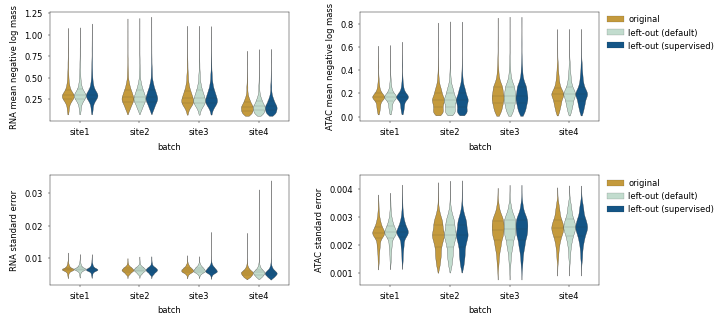

In [33]:
# load the sample-wise errors for the original model
sample_errors = pd.read_csv(os.path.join(result_dir, "batch_integration/human_bonemarrow_none_errors_samplewise_default.csv"))
sample_errors["model"] = "original"
# loop through the batches and get the sample-wise errors for the left-out batches
for i, batch in enumerate(batches):
    sample_errors_temp = pd.read_csv(os.path.join(result_dir, "batch_integration/human_bonemarrow_{}_errors_samplewise_default.csv".format(batch)))
    # only keep the entries where batch_id and model_id are the same
    sample_errors_temp = sample_errors_temp[sample_errors_temp["batch"] == batch]
    sample_errors_temp["model"] = "left-out (default)"
    sample_errors = pd.concat([sample_errors, sample_errors_temp])
    sample_errors_temp = pd.read_csv(os.path.join(result_dir, "batch_integration/human_bonemarrow_{}_errors_samplewise_supervised.csv".format(batch)))
    # only keep the entries where batch_id and model_id are the same
    sample_errors_temp = sample_errors_temp[sample_errors_temp["batch"] == batch]
    sample_errors_temp["model"] = "left-out (supervised)"
    sample_errors = pd.concat([sample_errors, sample_errors_temp])

# make a violinplot with the batch_id on the x axis and the prediction error on the y axis
# new figure
fig = plt.figure(figsize=(18 * cm, 9 * cm))
gs = gridspec.GridSpec(2, 2)
# add spacing
gs.update(wspace=0.3, hspace=0.5)
ax_list = []
# violinplot
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.violinplot(
    x="batch",
    y="rna_mean",
    data=sample_errors,
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    linewidth=linewidth,
    dodge="auto",
    cut=0,
    inner="quart",
    width=0.6
)
ax_list[-1].set_ylabel("RNA mean negative log mass")
ax_list[-1].legend().remove()
# violinplot
ax_list.append(fig.add_subplot(gs[0, 1]))
sns.violinplot(
    x="batch",
    y="atac_mean",
    data=sample_errors,
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    linewidth=linewidth,
    dodge="auto",
    cut=0,
    inner="quart",
    width=0.6
)
ax_list[-1].set_ylabel("ATAC mean negative log mass")
ax_list[-1].legend(
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 5,
)
# violinplot
ax_list.append(fig.add_subplot(gs[1, 0]))
sns.violinplot(
    x="batch",
    y="rna_se",
    data=sample_errors,
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    linewidth=linewidth,
    dodge="auto",
    cut=0,
    inner="quart",
    width=0.6
)
ax_list[-1].set_ylabel("RNA standard error")
ax_list[-1].legend().remove()
# violinplot
ax_list.append(fig.add_subplot(gs[1, 1]))
sns.violinplot(
    x="batch",
    y="atac_se",
    data=sample_errors,
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    linewidth=linewidth,
    dodge="auto",
    cut=0,
    inner="quart",
    width=0.6
)
ax_list[-1].set_ylabel("ATAC standard error")
ax_list[-1].legend(
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 5,
)

# save the figure
fig.savefig(os.path.join(plot_dir, "human_bonemarrow_samplewise_errors_leaveoneout.png"), bbox_inches="tight", dpi=300)

In [77]:
# include significance tests
from itertools import combinations
import scipy.stats

models = sample_errors['model'].unique()
batches = gene_errors['batch'].unique()
significance_dict = {}

for batch in batches:
    data_batch = gene_errors[sample_errors['batch'] == batch]
    for model1, model2 in combinations(models, 2):
        group1 = data_batch[data_batch['model'] == model1]['rna_mean']
        group2 = data_batch[data_batch['model'] == model2]['rna_mean']

        # Perform t-test
        #print(scipy.stats.mannwhitneyu(group1, group2))
        _, p_value = scipy.stats.mannwhitneyu(group1, group2)
        significant = p_value < 0.05

        # Store the significance
        significance_dict[(batch, model1, model2, "rna")] = significant

        group1 = data_batch[data_batch['model'] == model1]['atac_mean']
        group2 = data_batch[data_batch['model'] == model2]['atac_mean']

        # Perform t-test
        _, p_value = scipy.stats.mannwhitneyu(group1, group2)
        significant = p_value < 0.05

        # Store the significance
        significance_dict[(batch, model1, model2, "atac")] = significant

significance_dict

{('site1', 'original', 'left-out (default)', 'rna'): False,
 ('site1', 'original', 'left-out (default)', 'atac'): False,
 ('site1', 'original', 'left-out (supervised)', 'rna'): True,
 ('site1', 'original', 'left-out (supervised)', 'atac'): False,
 ('site1', 'left-out (default)', 'left-out (supervised)', 'rna'): False,
 ('site1', 'left-out (default)', 'left-out (supervised)', 'atac'): False,
 ('site2', 'original', 'left-out (default)', 'rna'): False,
 ('site2', 'original', 'left-out (default)', 'atac'): False,
 ('site2', 'original', 'left-out (supervised)', 'rna'): False,
 ('site2', 'original', 'left-out (supervised)', 'atac'): False,
 ('site2', 'left-out (default)', 'left-out (supervised)', 'rna'): False,
 ('site2', 'left-out (default)', 'left-out (supervised)', 'atac'): False,
 ('site3', 'original', 'left-out (default)', 'rna'): False,
 ('site3', 'original', 'left-out (default)', 'atac'): False,
 ('site3', 'original', 'left-out (supervised)', 'rna'): False,
 ('site3', 'original', 'lef

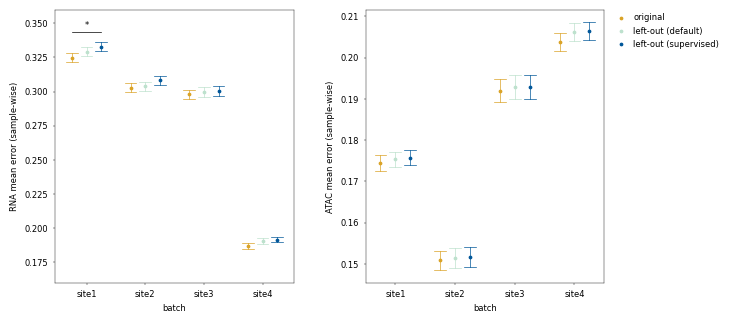

In [76]:
# now make the plot for the means (first row) as a point plot with standard error
# new figure
fig = plt.figure(figsize=(18 * cm, 9 * cm))
gs = gridspec.GridSpec(1, 2)
# add spacing
gs.update(wspace=0.3, hspace=0.5)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="batch",
    y="rna_mean",
    data=sample_errors,
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylim(0.16, 0.36)
# add a line and asterisk for significance over the first batch between first and last model
ax_list[-1].plot(
    [-0.25, 0.25],
    [sample_errors[sample_errors['batch'] == 'site1']['rna_mean'].mean() + 0.015] *2,
    color='black',
    linewidth=0.5
)
ax_list[-1].text(
    0,
    sample_errors[sample_errors['batch'] == 'site1']['rna_mean'].mean() + 0.02,
    "*",
    horizontalalignment='center',
    verticalalignment='center'
)
ax_list[-1].set_ylabel("RNA mean error (sample-wise)")
ax_list[-1].legend().remove()
ax_list.append(fig.add_subplot(gs[0, 1]))
sns.pointplot(
    x="batch",
    y="atac_mean",
    data=sample_errors,
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("ATAC mean error (sample-wise)")
ax_list[-1].legend(
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 5,
)

# save the figure
fig.savefig(os.path.join(plot_dir, "human_bonemarrow_samplewise_errors_leaveoneout_pointplot.png"), bbox_inches="tight", dpi=300)

In [94]:
# include significance tests
from itertools import combinations
import scipy.stats

models = sample_errors['model'].unique()
batches = sample_errors['batch'].unique()
significance_dict = {}

sample_errors['mean_error'] = sample_errors['rna_mean'] + sample_errors['atac_mean']

for batch in batches:
    data_batch = sample_errors[sample_errors['batch'] == batch]
    for model1, model2 in combinations(models, 2):
        group1 = data_batch[data_batch['model'] == model1]['mean_error']
        group2 = data_batch[data_batch['model'] == model2]['mean_error']

        # Perform t-test
        #print(scipy.stats.mannwhitneyu(group1, group2))
        _, p_value = scipy.stats.mannwhitneyu(group1, group2)
        significant = p_value < 0.05

        # Store the significance
        significance_dict[(batch, model1, model2)] = significant

significance_dict

{('site1', 'original', 'left-out (default)'): False,
 ('site1', 'original', 'left-out (supervised)'): False,
 ('site1', 'left-out (default)', 'left-out (supervised)'): False,
 ('site2', 'original', 'left-out (default)'): False,
 ('site2', 'original', 'left-out (supervised)'): False,
 ('site2', 'left-out (default)', 'left-out (supervised)'): False,
 ('site3', 'original', 'left-out (default)'): False,
 ('site3', 'original', 'left-out (supervised)'): False,
 ('site3', 'left-out (default)', 'left-out (supervised)'): False,
 ('site4', 'original', 'left-out (default)'): False,
 ('site4', 'original', 'left-out (supervised)'): False,
 ('site4', 'left-out (default)', 'left-out (supervised)'): False}

In [106]:
# load the sample-wise errors for the original model
sample_errors = pd.read_csv(os.path.join(result_dir, "batch_integration/human_bonemarrow/human_bonemarrow_none_errors_samplewise_default.csv"))
sample_errors["model"] = "full"
# loop through the batches and get the sample-wise errors for the left-out batches
for i, batch in enumerate(batches):
    sample_errors_temp = pd.read_csv(os.path.join(result_dir, "batch_integration/human_bonemarrow/human_bonemarrow_{}_errors_samplewise_default.csv".format(batch)))
    # only keep the entries where batch_id and model_id are the same
    sample_errors_temp = sample_errors_temp[sample_errors_temp["batch"] == batch]
    sample_errors_temp["model"] = "leave-one-out (naive)"
    sample_errors = pd.concat([sample_errors, sample_errors_temp])
    sample_errors_temp = pd.read_csv(os.path.join(result_dir, "batch_integration/human_bonemarrow/human_bonemarrow_{}_errors_samplewise_supervised.csv".format(batch)))
    # only keep the entries where batch_id and model_id are the same
    sample_errors_temp = sample_errors_temp[sample_errors_temp["batch"] == batch]
    sample_errors_temp["model"] = "leave-one-out (supervised)"
    sample_errors = pd.concat([sample_errors, sample_errors_temp])
random_seeds = [0, 37, 8790]
for i, seed in enumerate(random_seeds):
    sample_errors_temp = pd.read_csv(os.path.join(result_dir, "batch_integration/human_bonemarrow/human_bonemarrow_75percent_rs{}_errors_samplewise.csv".format(seed)))
    sample_errors_temp["model"] = "75%"
    sample_errors = pd.concat([sample_errors, sample_errors_temp])
# sort the dataframe by model with specific order (as categorical)
sample_errors["model"] = pd.Categorical(sample_errors["model"], ["full", "75%", "leave-one-out (naive)", "leave-one-out (supervised)"])
sample_errors['mean_error'] = sample_errors['rna_mean'] + sample_errors['atac_mean']

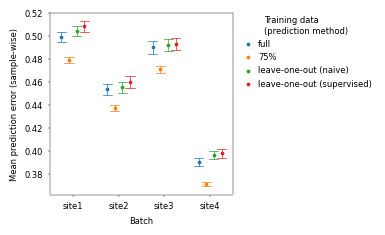

In [107]:
# now make the plot for the means (first row) as a point plot with standard error
# new figure
fig = plt.figure(figsize=(6 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 1)
# add spacing
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="batch",
    y="mean_error",
    data=sample_errors,
    hue="model",
    #palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("Mean prediction error (sample-wise)")
ax_list[-1].set_xlabel("Batch")
#handles, labels = ax_list[-1].get_legend_handles_labels()
ax_list[-1].legend(
    #handles,
    #["full", "leave-one-out\n(naive)", "leave-one-out\n(supervised)"],
    title="Training data\n(prediction method)",
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 2,
)

# save the figure
fig.savefig(os.path.join(plot_dir, "human_bonemarrow_samplewise_errors_leaveoneout_pointplot_totalerror_2.png"), bbox_inches="tight", dpi=300)

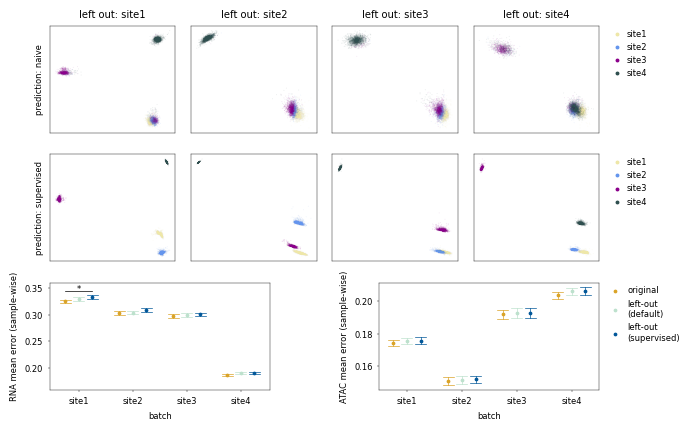

In [93]:
# create a grid of plots with 10 columns and 5 rows
import matplotlib.gridspec as gridspec

# set up figure
n_cols = 12
n_rows = 3
cm = 1 / 2.54
figure_height = 12
fig = plt.figure(figsize=(18 * cm, figure_height * cm))
gs = gridspec.GridSpec(n_rows, n_cols)
gs.update(wspace=0.5, hspace=0.2)
ax_list = []

batch_palette = ["#EEE7A8", "cornflowerblue", "darkmagenta", "darkslategray"]
stage_palette = "magma_r"
palette_3colrs = ["#DAA327", "#BDE1CD", "#015799"]

plt.rcParams.update(
    {
        "font.size": 6,
        "axes.linewidth": 0.3,
        "xtick.major.size": 1.5,
        "xtick.major.width": 0.3,
        "ytick.major.size": 1.5,
        "ytick.major.width": 0.3,
        "xtick.labelsize": 6,
        "ytick.labelsize": 6
    }
)

handletextpad = 0.1
#legend_x_dist, legend_y_dist = -0.0, 0.0
#grid_letter_positions = [-0.1, 0.05]
#grid_letter_fontsize = 8
#grid_letter_fontfamily = "sans-serif"
#grid_letter_fontweight = "bold"
#heatmap_fontsize = 4
point_size = 0.5
linewidth = 0.2
alpha = 0.1
point_linewidth = 0.0
handlesize = 0.3
dodge = True

# loop through the batches, get the representations and predictions and make the representation plots
for i, batch in enumerate(batches):
    # get the representations (they are stored as numpy arrays)
    rep_default = np.load(
        os.path.join(
            result_dir,
            "batch_integration/human_bonemarrow_{}_covariate_representations_default.npy".format(
                batch
            ),
        )
    )
    rep_sup = np.load(
        os.path.join(
            result_dir,
            "batch_integration/human_bonemarrow_{}_covariate_representations_supervised.npy".format(
                batch
            ),
        )
    )
    # make dataframes out of the reps and randomise the order
    rep_default = pd.DataFrame(rep_default, columns=["D1", "D2"])
    rep_default["batch"] = hue_bonemarrow
    # rep_default = rep_default.sample(frac=1)
    rep_sup = pd.DataFrame(rep_sup, columns=["D1", "D2"])
    rep_sup["batch"] = hue_bonemarrow
    # rep_sup = rep_sup.sample(frac=1)
    # plot them
    ax_list.append(fig.add_subplot(gs[0, (i*3):((i+1)*3)]))
    sns.scatterplot(
        data=rep_default,
        x="D1",
        y="D2",
        hue="batch",
        palette=batch_palette,
        alpha=alpha,
        ax=ax_list[-1],
        s=point_size,
        linewidth=point_linewidth,
    )
    ax_list[-1].set_title("left out: {}".format(batch))
    ax_list.append(fig.add_subplot(gs[1, (i*3):((i+1)*3)]))
    sns.scatterplot(
        data=rep_sup,
        x="D1",
        y="D2",
        hue="batch",
        palette=batch_palette,
        alpha=alpha,
        ax=ax_list[-1],
        s=point_size,
        linewidth=point_linewidth,
    )
    # remove the legends unless its the last plot
    if i < len(batches) - 1:
        ax_list[-2].get_legend().remove()
        ax_list[-1].get_legend().remove()
    else:
        ax_list[-2].legend(
            bbox_to_anchor=(1.05, 1),
            loc=2,
            borderaxespad=0.0,
            frameon=False,
            handletextpad=handletextpad,
            markerscale=handlesize,
        )
        ax_list[-1].legend(
            bbox_to_anchor=(1.05, 1),
            loc=2,
            borderaxespad=0.0,
            frameon=False,
            handletextpad=handletextpad,
            markerscale=handlesize,
        )
    # remove axis labels and ticks
    if i > 0:
        ax_list[-1].set_xlabel("")
        ax_list[-1].set_ylabel("")
        ax_list[-2].set_xlabel("")
        ax_list[-2].set_ylabel("")
    else:
        ax_list[-1].set_xlabel("")
        ax_list[-2].set_xlabel("")
        ax_list[-1].set_ylabel("prediction: supervised")
        ax_list[-2].set_ylabel("prediction: naive")
    # remove all axis ticks
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-2].set_xticks([])
    ax_list[-2].set_yticks([])

    # get the predictions
    if i == 0:
        pred_default = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/human_bonemarrow_{}_prediction_errors_default.csv".format(
                    batch
                ),
            )
        )
        pred_sup = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/human_bonemarrow_{}_prediction_errors_supervised.csv".format(
                    batch
                ),
            )
        )
    else:
        pred_default_temp = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/human_bonemarrow_{}_prediction_errors_default.csv".format(
                    batch
                ),
            )
        )
        pred_sup_temp = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/human_bonemarrow_{}_prediction_errors_supervised.csv".format(
                    batch
                ),
            )
        )
        pred_default = pd.concat([pred_default, pred_default_temp])
        pred_sup = pd.concat([pred_sup, pred_sup_temp])

# now prepare the data for the stage plots
predictions_bonemarrow_original["prediction_type"] = "naive (trained on all)"
# only keep the entries where batch_id and model_id are the same
pred_default = pred_default[pred_default["batch_id"] == pred_default["model_id"]]
pred_default["prediction_type"] = "naive (left-out)"
pred_sup = pred_sup[pred_sup["batch_id"] == pred_sup["model_id"]]
pred_sup["prediction_type"] = "supervised (left-out)"
# combine the dataframes
predictions_bonemarrow = pd.concat(
    [predictions_bonemarrow_original, pred_default, pred_sup]
)
predictions_bonemarrow["error"] = predictions_bonemarrow["error"] / n_features_bm

ax_list.append(fig.add_subplot(gs[2, :5]))
sns.pointplot(
    x="batch",
    y="rna_mean",
    data=sample_errors,
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylim(0.16, 0.36)
# add a line and asterisk for significance over the first batch between first and last model
ax_list[-1].plot(
    [-0.25, 0.25],
    [sample_errors[sample_errors['batch'] == 'site1']['rna_mean'].mean() + 0.015] *2,
    color='black',
    linewidth=0.5
)
ax_list[-1].text(
    0,
    sample_errors[sample_errors['batch'] == 'site1']['rna_mean'].mean() + 0.02,
    "*",
    horizontalalignment='center',
    verticalalignment='center'
)
ax_list[-1].set_ylabel("RNA mean error (sample-wise)")
ax_list[-1].legend().remove()

ax_list.append(fig.add_subplot(gs[2, 7:]))
sns.pointplot(
    x="batch",
    y="atac_mean",
    data=sample_errors,
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("ATAC mean error (sample-wise)")
# change the legend labels to include a line break
handles, labels = ax_list[-1].get_legend_handles_labels()
ax_list[-1].legend(
    handles,
    ["original", "left-out\n(default)", "left-out\n(supervised)"],
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 5,
)

# save the figure
fig.savefig(os.path.join(plot_dir, "human_bonemarrow_representations_and_errors.png"), bbox_inches="tight", dpi=300)

In [ ]:
# calculate the mean error and standard error of the mean for each batch and model type
mean_errors_rna = []
mean_errors_atac = []
se_errors_rna = []
se_errors_atac = []
batch_ids = []
model_ids = []
for batch in batches:
    for mod_id in sample_errors["model"].unique():
        batch_ids.append(batch)
        model_ids.append(mod_id)
        mean_errors_rna.append(
            sample_errors[(sample_errors["batch"] == batch) & (sample_errors["model"] == mod_id)]["rna_mean"].mean()
        )
        mean_errors_atac.append(
            sample_errors[(sample_errors["batch"] == batch) & (sample_errors["model"] == mod_id)]["atac_mean"].mean()
        )
        se_errors_rna.append(
            sample_errors[(sample_errors["batch"] == batch) & (sample_errors["model"] == mod_id)]["rna_mean"].std() / np.sqrt(sample_errors[(sample_errors["batch"] == batch) & (sample_errors["model"] == mod_id)].shape[0])
        )
        se_errors_atac.append(
            sample_errors[(sample_errors["batch"] == batch) & (sample_errors["model"] == mod_id)]["atac_mean"].std() / np.sqrt(sample_errors[(sample_errors["batch"] == batch) & (sample_errors["model"] == mod_id)].shape[0])
        )
# now make a dataframe and plot
mean_errors_with_se = pd.DataFrame(
    {
        "batch": batch_ids,
        "model": model_ids,
        "rna_mean": mean_errors_rna,
        "atac_mean": mean_errors_atac,
        "rna_se": se_errors_rna,
        "atac_se": se_errors_atac,
    }
)
mean_errors_with_se

In [34]:
# now load the genewise errors of the original model 
# and plot them as a scatter and density plot next to each other
# with the error on the y axis and the mean expression on the x axis
# make two rows for rna and atac

# first load the data and get mean expression
import anndata as ad
save_dir = "../results/trained_models/"
data_name = "human_bonemarrow"
adata = ad.read_h5ad("../../data/" + data_name + ".h5ad")
adata.X = adata.layers["counts"]
train_indices = list(np.where(adata.obs["train_val_test"] == "train")[0])
test_indices = list(np.where(adata.obs["train_val_test"] == "test")[0])
testset = adata[test_indices, :].copy()
adata = None
modality_switch = 13431
rna_means = np.asarray(np.mean(testset.X[:,:modality_switch], axis=0)).flatten()
atac_means = np.asarray(np.mean(testset.X[:,modality_switch:], axis=0)).flatten()
rna_variances = np.asarray(np.var(testset.X[:,:modality_switch], axis=0)).flatten()
atac_variances = np.asarray(np.var(testset.X[:,modality_switch:], axis=0)).flatten()

rna_errors = pd.read_csv(os.path.join(result_dir, "batch_integration/human_bonemarrow_none_errors_genewise_default.csv"))
rna_errors

,Unnamed: 0,rna_mean,rna_std,rna_se,feature,modality,atac_mean,atac_std,atac_se
0,0,0.052120,0.428889,0.005154,AL627309.5,rna,NaN,NaN,NaN
1,1,0.152116,0.652019,0.007835,LINC01409,rna,NaN,NaN,NaN
2,2,0.161626,0.659366,0.007923,LINC01128,rna,NaN,NaN,NaN
3,3,0.188455,0.681650,0.008191,NOC2L,rna,NaN,NaN,NaN
4,4,0.039675,0.416014,0.004999,KLHL17,rna,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
129916,116485,NaN,NaN,NaN,GL000219.1-90062-90937,atac,0.056751,0.620691,0.007459
129917,116486,NaN,NaN,NaN,GL000219.1-99257-100160,atac,0.939065,1.436662,0.017264
129918,116487,NaN,NaN,NaN,KI270726.1-27152-28034,atac,0.071392,0.690964,0.008303
129919,116488,NaN,NaN,NaN,KI270713.1-21434-22336,atac,1.045618,1.528031,0.018362


In [44]:
rna_variances = np.var(np.asarray(testset.X[:,:modality_switch].todense()), axis=0).flatten()
atac_variances = np.var(np.asarray(testset.X[:,modality_switch:].todense()), axis=0).flatten()

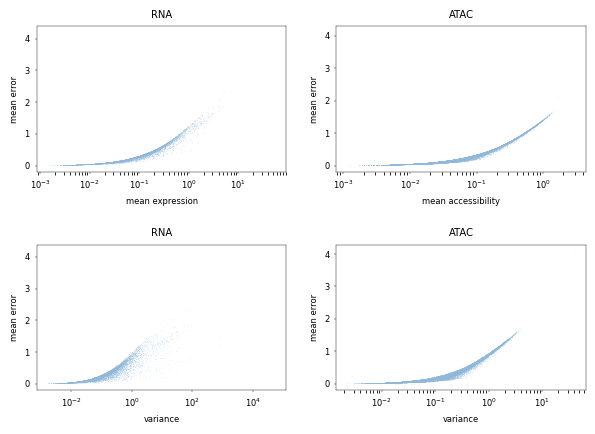

In [47]:
# prep the plot
fig = plt.figure(figsize=(18 * cm, 12 * cm))
gs = gridspec.GridSpec(2, 2)
# add spacing
gs.update(wspace=0.2, hspace=0.5)

# plot the rna errors
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.scatterplot(x=rna_means, y=rna_errors[rna_errors["modality"] == "rna"]["rna_mean"], s=point_size, linewidth=point_linewidth, alpha=alpha, ax=ax_list[-1])
ax_list[-1].set_xlabel("mean expression")
ax_list[-1].set_ylabel("mean error")
ax_list[-1].set_title("RNA")
ax_list[-1].set_xscale("log")
# same over variance
ax_list.append(fig.add_subplot(gs[1, 0]))
sns.scatterplot(x=rna_variances, y=rna_errors[rna_errors["modality"] == "rna"]["rna_mean"], s=point_size, linewidth=point_linewidth, alpha=alpha, ax=ax_list[-1])
ax_list[-1].set_xlabel("variance")
ax_list[-1].set_ylabel("mean error")
ax_list[-1].set_title("RNA")
ax_list[-1].set_xscale("log")
# plot the atac errors
ax_list.append(fig.add_subplot(gs[0, 1]))
sns.scatterplot(x=atac_means, y=rna_errors[rna_errors["modality"] == "atac"]["atac_mean"], s=point_size, linewidth=point_linewidth, alpha=alpha, ax=ax_list[-1])
ax_list[-1].set_xlabel("mean accessibility")
ax_list[-1].set_ylabel("mean error")
ax_list[-1].set_title("ATAC")
ax_list[-1].set_xscale("log")
# same over variance
ax_list.append(fig.add_subplot(gs[1, 1]))
sns.scatterplot(x=atac_variances, y=rna_errors[rna_errors["modality"] == "atac"]["atac_mean"], s=point_size, linewidth=point_linewidth, alpha=alpha, ax=ax_list[-1])
ax_list[-1].set_xlabel("variance")
ax_list[-1].set_ylabel("mean error")
ax_list[-1].set_title("ATAC")
ax_list[-1].set_xscale("log")

# save the figure
fig.savefig(os.path.join(plot_dir, "human_bonemarrow_genewise_errors_original.png"), bbox_inches="tight", dpi=300)

In [ ]:
# read in the recon metrics

## mouse gastrulation

In [129]:
# first, access the predictions for the normal models
data_name = "mouse_gastrulation"
n_features_mg = 11792+69862
predictions_gast_original = pd.read_csv(os.path.join(result_dir, "batch_integration/{}/{}_none_prediction_errors_default.csv".format(data_name, data_name)))
#predictions_gastrulation_original = pd.read_csv(os.path.join(result_dir, "batch_integration/mouse_gastrulation_none_prediction_errors_default.csv"))
hue_gast = predictions_gast_original["batch_id"]

In [148]:
# load the sample-wise errors for the original model
sample_gast_errors = pd.read_csv(os.path.join(result_dir, "batch_integration/mouse_gastrulation/mouse_gastrulation_none_errors_samplewise_default.csv"))
sample_gast_errors["model"] = "full"
# loop through the batches and get the sample-wise errors for the left-out batches
for i, batch in enumerate(stages):
    sample_errors_temp = pd.read_csv(os.path.join(result_dir, "batch_integration/mouse_gastrulation/mouse_gastrulation_{}_errors_samplewise_default.csv".format(batch)))
    # only keep the entries where batch_id and model_id are the same
    sample_errors_temp = sample_errors_temp[sample_errors_temp["batch"] == batch]
    sample_errors_temp["model"] = "leave-one-out (naive)"
    sample_gast_errors = pd.concat([sample_gast_errors, sample_errors_temp])
    sample_errors_temp = pd.read_csv(os.path.join(result_dir, "batch_integration/mouse_gastrulation/mouse_gastrulation_{}_errors_samplewise_supervised.csv".format(batch)))
    # only keep the entries where batch_id and model_id are the same
    sample_errors_temp = sample_errors_temp[sample_errors_temp["batch"] == batch]
    sample_errors_temp["model"] = "leave-one-out (supervised)"
    sample_gast_errors = pd.concat([sample_gast_errors, sample_errors_temp])
# sort the dataframe by model with specific order (as categorical)
sample_gast_errors["model"] = pd.Categorical(sample_gast_errors["model"], ["full", "leave-one-out (naive)", "leave-one-out (supervised)"])
sample_gast_errors['mean_error'] = sample_gast_errors['rna_mean'] + sample_gast_errors['atac_mean']

In [149]:
# include significance tests
from itertools import combinations
import scipy.stats

models = sample_gast_errors['model'].unique()
batches = sample_gast_errors['batch'].unique()
significance_dict = {}

for batch in stages:
    data_batch = sample_gast_errors[sample_gast_errors['batch'] == batch]
    for model1, model2 in combinations(models, 2):
        group1 = data_batch[data_batch['model'] == model1]['rna_mean']
        group2 = data_batch[data_batch['model'] == model2]['rna_mean']

        # Perform t-test
        #print(scipy.stats.mannwhitneyu(group1, group2))
        _, p_value = scipy.stats.mannwhitneyu(group1, group2)
        significant = p_value < 0.05

        # Store the significance
        significance_dict[(batch, model1, model2, "rna")] = significant

        group1 = data_batch[data_batch['model'] == model1]['atac_mean']
        group2 = data_batch[data_batch['model'] == model2]['atac_mean']

        # Perform t-test
        _, p_value = scipy.stats.mannwhitneyu(group1, group2)
        significant = p_value < 0.05

        # Store the significance
        significance_dict[(batch, model1, model2, "atac")] = significant

# print all entries that are significant
for key, value in significance_dict.items():
    if value:
        print(key)

('E7.5', 'full', 'leave-one-out (naive)', 'rna')
('E7.5', 'full', 'leave-one-out (supervised)', 'rna')
('E8.0', 'full', 'leave-one-out (supervised)', 'rna')
('E8.0', 'leave-one-out (naive)', 'leave-one-out (supervised)', 'rna')
('E8.5', 'full', 'leave-one-out (supervised)', 'rna')
('E8.75', 'full', 'leave-one-out (supervised)', 'rna')
('E8.75', 'leave-one-out (naive)', 'leave-one-out (supervised)', 'rna')


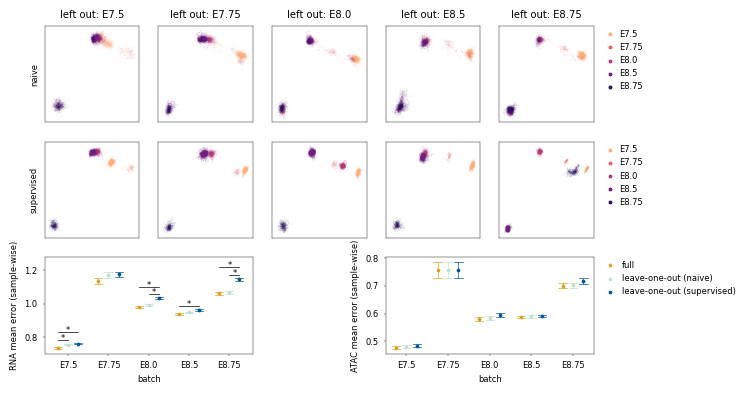

In [162]:
# create a grid of plots with 10 columns and 5 rows
import matplotlib.gridspec as gridspec

# set up figure
n_cols = 5
n_rows = 3
cm = 1 / 2.54
figure_height = 18 * (n_rows / n_cols)
fig = plt.figure(figsize=(18 * cm, figure_height * cm))
gs = gridspec.GridSpec(n_rows, n_cols)
#gs.update(wspace=0.5, hspace=0.5)
ax_list = []

batch_palette = ["#EEE7A8", "cornflowerblue", "darkmagenta", "darkslategray"]
stage_palette = "magma_r"
palette_3colrs = ["#DAA327", "#BDE1CD", "#015799"]

plt.rcParams.update(
    {
        "font.size": 6,
        "axes.linewidth": 0.3,
        "xtick.major.size": 1.5,
        "xtick.major.width": 0.3,
        "ytick.major.size": 1.5,
        "ytick.major.width": 0.3,
    }
)

handletextpad = 0.1
#legend_x_dist, legend_y_dist = -0.0, 0.0
#grid_letter_positions = [-0.1, 0.05]
#grid_letter_fontsize = 8
#grid_letter_fontfamily = "sans-serif"
#grid_letter_fontweight = "bold"
#heatmap_fontsize = 4
point_size = 0.5
linewidth = 0.2
alpha = 0.1
point_linewidth = 0.0
handlesize = 0.3
dodge = True

# loop through the batches, get the representations and predictions and make the representation plots
for i, batch in enumerate(stages):
    # get the representations (they are stored as numpy arrays)
    rep_default = np.load(
        os.path.join(
            result_dir,
            "batch_integration/{}/{}_{}_covariate_representations_default.npy".format(
                data_name, data_name, batch
            ),
        )
    )
    rep_sup = np.load(
        os.path.join(
            result_dir,
            "batch_integration/{}/{}_{}_covariate_representations_supervised.npy".format(
                data_name, data_name, batch
            ),
        )
    )
    # make dataframes out of the reps and randomise the order
    rep_default = pd.DataFrame(rep_default, columns=["D1", "D2"])
    rep_default["batch"] = hue_gast
    # rep_default = rep_default.sample(frac=1)
    rep_sup = pd.DataFrame(rep_sup, columns=["D1", "D2"])
    rep_sup["batch"] = hue_gast
    # rep_sup = rep_sup.sample(frac=1)
    # plot them
    ax_list.append(fig.add_subplot(gs[0, i]))
    sns.scatterplot(
        data=rep_default,
        x="D1",
        y="D2",
        hue="batch",
        palette=stage_palette,
        alpha=alpha,
        ax=ax_list[-1],
        s=point_size,
        linewidth=point_linewidth,
    )
    ax_list[-1].set_title("left out: {}".format(batch))
    ax_list.append(fig.add_subplot(gs[1, i]))
    sns.scatterplot(
        data=rep_sup,
        x="D1",
        y="D2",
        hue="batch",
        palette=stage_palette,
        alpha=alpha,
        ax=ax_list[-1],
        s=point_size,
        linewidth=point_linewidth,
    )
    # remove the legends unless its the last plot
    if i < len(stages) - 1:
        ax_list[-2].get_legend().remove()
        ax_list[-1].get_legend().remove()
    else:
        ax_list[-2].legend(
            bbox_to_anchor=(1.05, 1),
            loc=2,
            borderaxespad=0.0,
            frameon=False,
            handletextpad=handletextpad,
            markerscale=handlesize,
        )
        ax_list[-1].legend(
            bbox_to_anchor=(1.05, 1),
            loc=2,
            borderaxespad=0.0,
            frameon=False,
            handletextpad=handletextpad,
            markerscale=handlesize,
        )
    # remove axis labels and ticks
    if i > 0:
        ax_list[-1].set_xlabel("")
        ax_list[-1].set_ylabel("")
        ax_list[-2].set_xlabel("")
        ax_list[-2].set_ylabel("")
    else:
        ax_list[-1].set_xlabel("")
        ax_list[-2].set_xlabel("")
        ax_list[-1].set_ylabel("supervised")
        ax_list[-2].set_ylabel("naive")
    # remove all axis ticks
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-2].set_xticks([])
    ax_list[-2].set_yticks([])

    # get the predictions
    if i == 0:
        pred_default = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/{}/{}_{}_prediction_errors_default.csv".format(
                    data_name, data_name, batch
                ),
            )
        )
        pred_sup = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/{}/{}_{}_prediction_errors_supervised.csv".format(
                    data_name, data_name, batch
                ),
            )
        )
    else:
        pred_default_temp = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/{}/{}_{}_prediction_errors_default.csv".format(
                    data_name, data_name, batch
                ),
            )
        )
        pred_sup_temp = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/{}/{}_{}_prediction_errors_supervised.csv".format(
                    data_name, data_name, batch
                ),
            )
        )
        pred_default = pd.concat([pred_default, pred_default_temp])
        pred_sup = pd.concat([pred_sup, pred_sup_temp])

# now prepare the data for the stage plots
predictions_gast_original["prediction_type"] = "naive (trained on all)"
# only keep the entries where batch_id and model_id are the same
pred_default = pred_default[pred_default["batch_id"] == pred_default["model_id"]]
pred_default["prediction_type"] = "naive (left-out)"
pred_sup = pred_sup[pred_sup["batch_id"] == pred_sup["model_id"]]
pred_sup["prediction_type"] = "supervised (left-out)"
# combine the dataframes
predictions_gast = pd.concat(
    [predictions_gast_original, pred_default, pred_sup]
)
predictions_gast["error"] = predictions_gast["error"] / n_features_mg

# make a boxplot with the batch_id on the x axis and the prediction error on the y axis
#ax_list.append(fig.add_subplot(gs[2, : len(stages)]))
ax_list.append(fig.add_subplot(gs[2, :2]))
sns.pointplot(
    x="batch",
    y="rna_mean",
    data=sample_gast_errors,
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("RNA mean error (sample-wise)")
# change the legend labels to include a line break
handles, labels = ax_list[-1].get_legend_handles_labels()
ax_list[-1].legend().remove()
ax_list[-1].plot(
    [-0.25, 0],
    [sample_gast_errors[sample_gast_errors['batch'] == 'E7.5']['rna_mean'].mean() + 0.03] *2,
    color='black',
    linewidth=0.5
)
ax_list[-1].plot(
    [-0.25, 0.25],
    [sample_gast_errors[sample_gast_errors['batch'] == 'E7.5']['rna_mean'].mean() + 0.08] *2,
    color='black',
    linewidth=0.5
)
ax_list[-1].text(
    -0.125,
    sample_gast_errors[sample_gast_errors['batch'] == 'E7.5']['rna_mean'].mean() + 0.04,
    "*",
    horizontalalignment='center',
    verticalalignment='center'
)
ax_list[-1].text(
    0,
    sample_gast_errors[sample_gast_errors['batch'] == 'E7.5']['rna_mean'].mean() + 0.09,
    "*",
    horizontalalignment='center',
    verticalalignment='center'
)
# E8.0
ax_list[-1].plot(
    [1.75, 2.25],
    [sample_gast_errors[sample_gast_errors['batch'] == 'E8.0']['rna_mean'].mean() + 0.1] *2,
    color='black',
    linewidth=0.5
)
ax_list[-1].plot(
    [2.0, 2.25],
    [sample_gast_errors[sample_gast_errors['batch'] == 'E8.0']['rna_mean'].mean() + 0.06] *2,
    color='black',
    linewidth=0.5
)
ax_list[-1].text(
    2,
    sample_gast_errors[sample_gast_errors['batch'] == 'E8.0']['rna_mean'].mean() + 0.11,
    "*",
    horizontalalignment='center',
    verticalalignment='center'
)
ax_list[-1].text(
    2.125,
    sample_gast_errors[sample_gast_errors['batch'] == 'E8.0']['rna_mean'].mean() + 0.07,
    "*",
    horizontalalignment='center',
    verticalalignment='center'
)
# E8.5
ax_list[-1].plot(
    [2.75, 3.25],
    [sample_gast_errors[sample_gast_errors['batch'] == 'E8.5']['rna_mean'].mean() + 0.04] *2,
    color='black',
    linewidth=0.5
)
ax_list[-1].text(
    3,
    sample_gast_errors[sample_gast_errors['batch'] == 'E8.5']['rna_mean'].mean() + 0.05,
    "*",
    horizontalalignment='center',
    verticalalignment='center'
)
# E8.75
ax_list[-1].plot(
    [3.75, 4.25],
    [sample_gast_errors[sample_gast_errors['batch'] == 'E8.75']['rna_mean'].mean() + 0.13] *2,
    color='black',
    linewidth=0.5
)
ax_list[-1].plot(
    [4.0, 4.25],
    [sample_gast_errors[sample_gast_errors['batch'] == 'E8.75']['rna_mean'].mean() + 0.08] *2,
    color='black',
    linewidth=0.5
)
ax_list[-1].text(
    4,
    sample_gast_errors[sample_gast_errors['batch'] == 'E8.75']['rna_mean'].mean() + 0.14,
    "*",
    horizontalalignment='center',
    verticalalignment='center'
)
ax_list[-1].text(
    4.125,
    sample_gast_errors[sample_gast_errors['batch'] == 'E8.75']['rna_mean'].mean() + 0.09,
    "*",
    horizontalalignment='center',
    verticalalignment='center'
)
ax_list[-1].set_ylim(0.7, 1.28)

ax_list.append(fig.add_subplot(gs[2, 3:]))
sns.pointplot(
    x="batch",
    y="atac_mean",
    data=sample_gast_errors,
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("ATAC mean error (sample-wise)")
# change the legend labels to include a line break
#handles, labels = ax_list[-1].get_legend_handles_labels()
ax_list[-1].legend(
    #handles,
    #["original", "left-out\n(default)", "left-out\n(supervised)"],
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 5,
)

# save the figure
fig.savefig(os.path.join(plot_dir, "mouse_gastrulation_representations_and_predictions.png"), bbox_inches="tight", dpi=300)

In [166]:
predictions_gast

,Unnamed: 0,sample_id,batch_id,error,model_id,prediction_type
0,0,E7.5_rep1#AAACCGAAGTTGTCAA-1,E7.5,0.897963,none,naive (trained on all)
1,1,E7.5_rep1#AAACCGGCAACCTAAT-1,E7.5,0.675616,none,naive (trained on all)
2,2,E7.5_rep1#AAACGTACAAACCTTG-1,E7.5,0.927161,none,naive (trained on all)
3,3,E7.5_rep1#AAAGCAAGTCGAAGTC-1,E7.5,0.255326,none,naive (trained on all)
4,4,E7.5_rep1#AAAGCCGCAGCTAACC-1,E7.5,0.268463,none,naive (trained on all)
...,...,...,...,...,...,...
5681,5681,E8.75_rep2#TTTCCTGAGGTCTTGG-1,E8.75,1.140129,E8.75,supervised (left-out)
5682,5682,E8.75_rep2#TTTCTTGCACACCAAC-1,E8.75,0.321621,E8.75,supervised (left-out)
5683,5683,E8.75_rep2#TTTGACCGTAGCTAAT-1,E8.75,0.429117,E8.75,supervised (left-out)
5684,5684,E8.75_rep2#TTTGGCTGTAGTTGGC-1,E8.75,0.627715,E8.75,supervised (left-out)


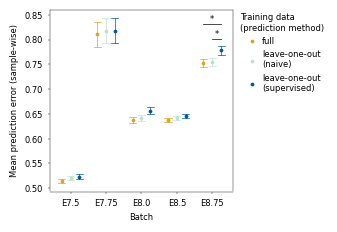

In [174]:
# now make the plot for the means (first row) as a point plot with standard error
# new figure
fig = plt.figure(figsize=(6 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 1)
# add spacing
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="batch_id",
    y="error",
    data=predictions_gast,
    hue="prediction_type",
    palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("Mean prediction error (sample-wise)")
ax_list[-1].set_xlabel("Batch")
handles, labels = ax_list[-1].get_legend_handles_labels()
ax_list[-1].legend(
    handles,
    ["full", "leave-one-out\n(naive)", "leave-one-out\n(supervised)"],
    title="Training data\n(prediction method)",
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 2,
)

ax_list[-1].plot(
    [3.75, 4.25],
    [predictions_gast[predictions_gast['batch_id'] == 'E8.75']['error'].mean() + 0.07] *2,
    color='black',
    linewidth=0.5
)
ax_list[-1].plot(
    [4.0, 4.25],
    [predictions_gast[predictions_gast['batch_id'] == 'E8.75']['error'].mean() + 0.04] *2,
    color='black',
    linewidth=0.5
)
ax_list[-1].text(
    4,
    predictions_gast[predictions_gast['batch_id'] == 'E8.75']['error'].mean() + 0.08,
    "*",
    horizontalalignment='center',
    verticalalignment='center'
)
ax_list[-1].text(
    4.125,
    predictions_gast[predictions_gast['batch_id'] == 'E8.75']['error'].mean() + 0.05,
    "*",
    horizontalalignment='center',
    verticalalignment='center'
)

# save the figure
fig.savefig(os.path.join(plot_dir, "mouse_gastrulation_samplewise_errors_leaveoneout_pointplot_totalerror.png"), bbox_inches="tight", dpi=300)

In [176]:
# include significance tests
from itertools import combinations
import scipy.stats

models = predictions_gast['prediction_type'].unique()
batches = predictions_gast['batch_id'].unique()
significance_dict = {}

for batch in stages:
    data_batch = predictions_gast[predictions_gast['batch_id'] == batch]
    for model1, model2 in combinations(models, 2):
        group1 = data_batch[data_batch['prediction_type'] == model1]['error']
        group2 = data_batch[data_batch['prediction_type'] == model2]['error']

        # Perform t-test
        #print(scipy.stats.mannwhitneyu(group1, group2))
        _, p_value = scipy.stats.mannwhitneyu(group1, group2)
        significant = p_value < 0.05

        # Store the significance
        if significant:
            significance_dict[(batch, model1, model2)] = p_value
        else:
            significance_dict[(batch, model1, model2)] = significant

# print all entries that are significant
for key, value in significance_dict.items():
    if value:
        print(key, value)

('E8.75', 'naive (trained on all)', 'supervised (left-out)') 0.02961370969428476
('E8.75', 'naive (left-out)', 'supervised (left-out)') 0.04600888065474628


In [ ]:
data_name = "mouse_gastrulation"
result_path = "../results/revision/analysis/batch_integration/" + data_name + "/"
plot_path = "../results/revision/plots/" + data_name + "/"

import anndata as ad

# load data
save_dir = "../results/trained_models/"
adata = ad.read_h5ad("../../data/" + data_name + ".h5ad")
adata.X = adata.layers["counts"]
train_indices = list(np.where(adata.obs["train_val_test"] == "train")[0])
test_indices = list(np.where(adata.obs["train_val_test"] == "test")[0])
trainset = adata[train_indices, :].copy()
adata = None

## data stats

In [3]:
import anndata as ad
import mudata as md

import seaborn as sns

In [4]:
data_name = "mouse_gastrulation"
data = md.read("../../data/mouse_gastrulation.h5mu", backed=False)

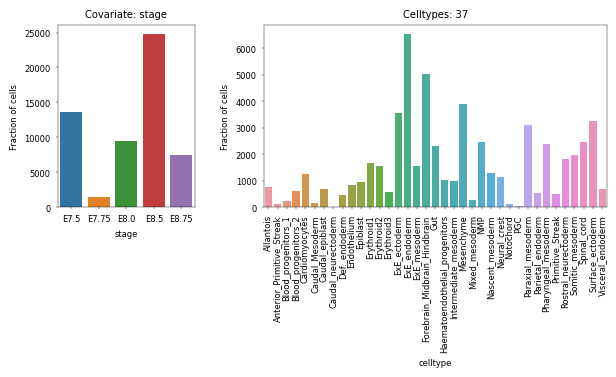

In [9]:
# make bar plots for meta data stats
covariate_name = "stage"
ct_name = "celltype"

# make a figure with 2 subplots: one for the covariate and one for the celltypes
fig = plt.figure(figsize=(18 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 3)
# add spacing
gs.update(wspace=0.5, hspace=0.0)
ax_list = []

# first plot the covariate
ax_list.append(fig.add_subplot(gs[0, 0]))
# make a summary statistic plot of the fractions of the covariates
sns.barplot(
    x=covariate_name,
    y="fraction",
    data=data.obs.groupby(covariate_name).size().reset_index(name="fraction"),
    ax=ax_list[-1],
)
ax_list[-1].set_xlabel(covariate_name)
ax_list[-1].set_ylabel("Fraction of cells")
ax_list[-1].set_title("Covariate: {}".format(covariate_name))

# now plot the celltypes
ax_list.append(fig.add_subplot(gs[0, 1:]))
# make a summary statistic plot of the fractions of the celltypes
sns.barplot(
    x=ct_name,
    y="fraction",
    data=data.obs.groupby(ct_name).size().reset_index(name="fraction"),
    ax=ax_list[-1],
)
ax_list[-1].set_xlabel(ct_name)
ax_list[-1].set_ylabel("Fraction of cells")
ax_list[-1].set_xticklabels(ax_list[-1].get_xticklabels(), rotation=90)
# set the title with the unique number of celltypes
ax_list[-1].set_title("Celltypes: {}".format(len(data.obs[ct_name].unique())))

# save the figure
fig.savefig(os.path.join(plot_dir, data_name+"_meta_data_stats.png"), bbox_inches="tight", dpi=300)

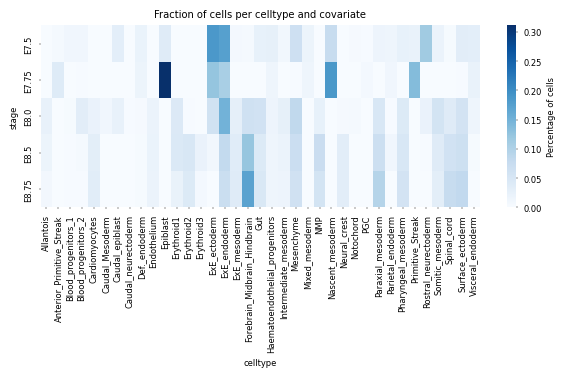

In [14]:
# now make a heatmap with the fractions of covariate against celltype
# first get the fractions
frac_df = data.obs.groupby([covariate_name, ct_name]).size().reset_index(name="fraction")
# normalize by the number per covariate (to be percent)
frac_df["fraction"] = frac_df["fraction"] / frac_df.groupby(covariate_name)["fraction"].transform("sum")
# pivot the dataframe
frac_df = frac_df.pivot(index=covariate_name, columns=ct_name, values="fraction")
# now plot
fig = plt.figure(figsize=(18 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 1)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
# make palette start with white for zero
sns.heatmap(
    data=frac_df,
    cmap="Blues",
    ax=ax_list[-1],
    cbar_kws={"label": "Percentage of cells"},
)
ax_list[-1].set_xlabel(ct_name)
ax_list[-1].set_ylabel(covariate_name)
ax_list[-1].set_title("Fraction of cells per celltype and covariate")

# save the figure
fig.savefig(os.path.join(plot_dir, data_name+"_meta_data_heatmap.png"), bbox_inches="tight", dpi=300)

In [15]:
data_name = "human_brain"
data = md.read("../../data/human_brain.h5mu", backed=False)

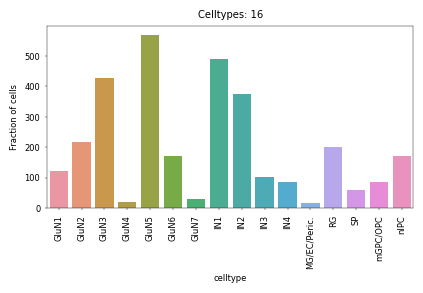

In [17]:
# make bar plots for meta data stats
covariate_name = "stage"
ct_name = "celltype"

# make a figure with 2 subplots: one for the covariate and one for the celltypes
fig = plt.figure(figsize=(12 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 1)
# add spacing
gs.update(wspace=0.5, hspace=0.0)
ax_list = []

# first plot the covariate
ax_list.append(fig.add_subplot(gs[0, 0]))
# make a summary statistic plot of the fractions of the celltypes
sns.barplot(
    x=ct_name,
    y="fraction",
    data=data.obs.groupby(ct_name).size().reset_index(name="fraction"),
    ax=ax_list[-1],
)
ax_list[-1].set_xlabel(ct_name)
ax_list[-1].set_ylabel("Fraction of cells")
ax_list[-1].set_xticklabels(ax_list[-1].get_xticklabels(), rotation=90)
# set the title with the unique number of celltypes
ax_list[-1].set_title("Celltypes: {}".format(len(data.obs[ct_name].unique())))

# save the figure
fig.savefig(os.path.join(plot_dir, data_name+"_meta_data_stats.png"), bbox_inches="tight", dpi=300)

In [19]:
data_name = "human_bonemarrow"
data = ad.read_h5ad("../../data/" + data_name + ".h5ad")

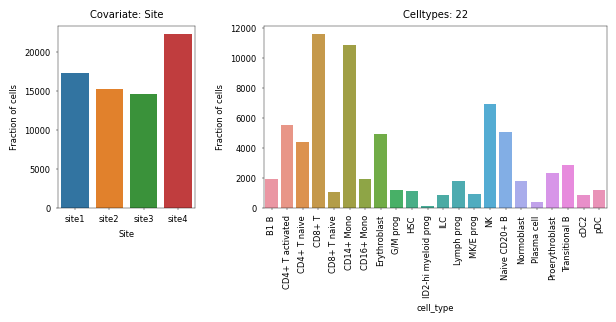

In [20]:
# make bar plots for meta data stats
covariate_name = "Site"
ct_name = "cell_type"

# make a figure with 2 subplots: one for the covariate and one for the celltypes
fig = plt.figure(figsize=(18 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 3)
# add spacing
gs.update(wspace=0.5, hspace=0.0)
ax_list = []

# first plot the covariate
ax_list.append(fig.add_subplot(gs[0, 0]))
# make a summary statistic plot of the fractions of the covariates
sns.barplot(
    x=covariate_name,
    y="fraction",
    data=data.obs.groupby(covariate_name).size().reset_index(name="fraction"),
    ax=ax_list[-1],
)
ax_list[-1].set_xlabel(covariate_name)
ax_list[-1].set_ylabel("Fraction of cells")
ax_list[-1].set_title("Covariate: {}".format(covariate_name))

# now plot the celltypes
ax_list.append(fig.add_subplot(gs[0, 1:]))
# make a summary statistic plot of the fractions of the celltypes
sns.barplot(
    x=ct_name,
    y="fraction",
    data=data.obs.groupby(ct_name).size().reset_index(name="fraction"),
    ax=ax_list[-1],
)
ax_list[-1].set_xlabel(ct_name)
ax_list[-1].set_ylabel("Fraction of cells")
ax_list[-1].set_xticklabels(ax_list[-1].get_xticklabels(), rotation=90)
# set the title with the unique number of celltypes
ax_list[-1].set_title("Celltypes: {}".format(len(data.obs[ct_name].unique())))

# save the figure
fig.savefig(os.path.join(plot_dir, data_name+"_meta_data_stats.png"), bbox_inches="tight", dpi=300)

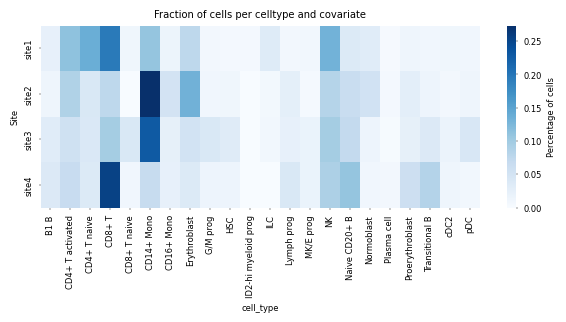

In [21]:
# now make a heatmap with the fractions of covariate against celltype
# first get the fractions
frac_df = data.obs.groupby([covariate_name, ct_name]).size().reset_index(name="fraction")
# normalize by the number per covariate (to be percent)
frac_df["fraction"] = frac_df["fraction"] / frac_df.groupby(covariate_name)["fraction"].transform("sum")
# pivot the dataframe
frac_df = frac_df.pivot(index=covariate_name, columns=ct_name, values="fraction")
# now plot
fig = plt.figure(figsize=(18 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 1)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
# make palette start with white for zero
sns.heatmap(
    data=frac_df,
    cmap="Blues",
    ax=ax_list[-1],
    cbar_kws={"label": "Percentage of cells"},
)
ax_list[-1].set_xlabel(ct_name)
ax_list[-1].set_ylabel(covariate_name)
ax_list[-1].set_title("Fraction of cells per celltype and covariate")

# save the figure
fig.savefig(os.path.join(plot_dir, data_name+"_meta_data_heatmap.png"), bbox_inches="tight", dpi=300)

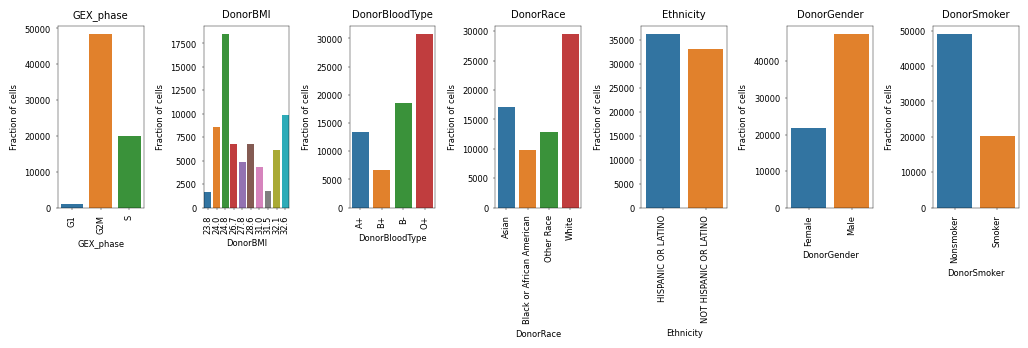

In [27]:
# make barplots for "GEX_phase", "DonorBMI", "DonorBloodType", "DonorRace", "Ethnicity", "DonorGender", "DonorSmoker"
# one subplot per category

categories = [
    "GEX_phase",
    "DonorBMI",
    "DonorBloodType",
    "DonorRace",
    "Ethnicity",
    "DonorGender",
    "DonorSmoker"
]

# determine number of rows and columns (max number of columns: 4)
n_cols = min(8, len(categories))
n_rows = int(np.ceil(len(categories) / n_cols))

fig = plt.figure(figsize=(4.5*n_cols * cm, 6*n_rows * cm))
gs = gridspec.GridSpec(n_rows, n_cols)
# add spacing
gs.update(wspace=0.1*n_cols, hspace=0.5)

ax_list = []
for i in range(len(categories)):
    ax_list.append(fig.add_subplot(gs[i // n_cols, i % n_cols]))
    # make a summary statistic plot of the fractions of the covariates
    sns.barplot(
        x=categories[i],
        y="fraction",
        data=data.obs.groupby(categories[i]).size().reset_index(name="fraction"),
        ax=ax_list[-1],
    )
    ax_list[-1].set_xlabel(categories[i])
    ax_list[-1].set_ylabel("Fraction of cells")
    ax_list[-1].set_xticklabels(ax_list[-1].get_xticklabels(), rotation=90)
    ax_list[-1].set_title(categories[i])

# save the figure
fig.savefig(os.path.join(plot_dir, data_name+"_meta_data_stats_extra.png"), bbox_inches="tight", dpi=300)

In [28]:
data = None

In [3]:
data_name = "human_bonemarrow"
result_path = "../results/revision/analysis/batch_integration/" + data_name + "/"
plot_path = "../results/revision/plots/" + data_name + "/"

import anndata as ad

# load data
save_dir = "../results/trained_models/"
data_name = "human_bonemarrow"
adata = ad.read_h5ad("../../data/" + data_name + ".h5ad")
adata.X = adata.layers["counts"]
train_indices = list(np.where(adata.obs["train_val_test"] == "train")[0])
test_indices = list(np.where(adata.obs["train_val_test"] == "test")[0])
trainset = adata[train_indices, :].copy()
adata = None

In [4]:
model_name = "human_bonemarrow_l20_h2-3"

from omicsdgd import DGD
model = DGD.load(
    data=trainset, save_dir=save_dir + data_name + "/", model_name=model_name
)

CUDA Available: False
Number of GPUs: 0
using device:  cpu

        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 4
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
correction_test_rep.z
#######################
Training status
#######################
True


In [5]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.5)
rep = reducer.fit_transform(model.representation.z.detach().cpu().numpy())

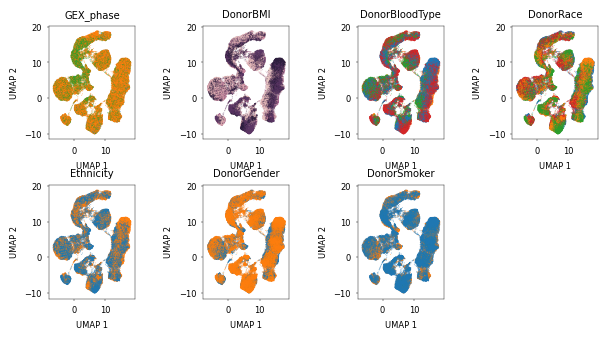

In [9]:
# make a scatterplot of the representations colored by each of the categories (one subplot each)

categories = [
    "GEX_phase",
    "DonorBMI",
    "DonorBloodType",
    "DonorRace",
    "Ethnicity",
    "DonorGender",
    "DonorSmoker"
]

n_cols = min(4, len(categories))
n_rows = int(np.ceil(len(categories) / n_cols))

fig = plt.figure(figsize=(4.5*n_cols * cm, 4.5*n_rows * cm))
gs = gridspec.GridSpec(n_rows, n_cols)
# add spacing
gs.update(wspace=0.2*n_cols, hspace=0.2*n_rows)

ax_list = []
for i in range(len(categories)):
    ax_list.append(fig.add_subplot(gs[i // n_cols, i % n_cols]))
    # make a summary statistic plot of the fractions of the covariates
    sns.scatterplot(
        x=rep[:, 0],
        y=rep[:, 1],
        hue=trainset.obs[categories[i]],
        ax=ax_list[-1],
        s=0.5,
        linewidth=0,
        alpha=0.5,
    )
    ax_list[-1].set_xlabel("UMAP 1")
    ax_list[-1].set_ylabel("UMAP 2")
    ax_list[-1].set_title(categories[i])
    ax_list[-1].get_legend().remove()

# save the figure
fig.savefig(os.path.join(plot_dir, data_name+"_representations_extra_covariates.png"), bbox_inches="tight", dpi=300)

## Performance

### comparing different setups

In [3]:
# compare performance between normal multiDGD, multiDGD with a single Gaussian, multiDGD without covariate modeling, and scDGD

random_seeds = [0, 37, 8790]*4
model_types = ["", "", "", "", "", "", "noCovariate", "noCovariate", "noCovariate", "scDGD", "scDGD", "scDGD"]
n_components = [22, 22, 22, 1, 1, 1, 22, 22, 22, 22, 22, 22]
model_descriptors = ["default", "default", "default", "single Gaussian", "single Gaussian", "single Gaussian", "no covariate", "no covariate", "no covariate", "scDGD", "scDGD", "scDGD"]
n_features_bm = 129921
modality_switch = 13431

# the results are saved according to this format:
"""
temp_df.to_csv(
    result_path
    + data_name
    + "_rs"
    + str(random_seeds[i])
    + "_"
    + model_types[i]
    + "_ncomp"
    + str(n_components[i])
    + "_prediction_errors_supervised.csv"
)
"""
data_name = "human_bonemarrow"
result_path = "../results/revision/analysis/batch_integration/" + data_name + "/"
plot_path = "../results/revision/plots/" + data_name + "/"

In [17]:
# load all prediction errors
prediction_errors = pd.DataFrame()
for i, model_name in enumerate(model_descriptors):
    temp_df = pd.read_csv(
        result_path
        + data_name
        + "_rs"
        + str(random_seeds[i])
        + "_"
        + model_types[i]
        + "_ncomp"
        + str(n_components[i])
        + "_prediction_errors_supervised.csv"
    )
    temp_df["model"] = model_name
    temp_df["rs"] = random_seeds[i]
    prediction_errors = pd.concat([prediction_errors, temp_df])
prediction_errors["normalized error"] = prediction_errors["error"] / n_features_bm

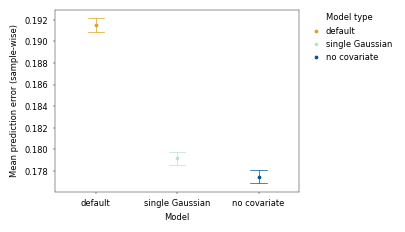

In [24]:
# plot the errors by model as point plot with standard error

# new figure
fig = plt.figure(figsize=(8 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 1)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="model",
    y="normalized error",
    data=prediction_errors[(prediction_errors["model"] != "scDGD")],
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("Mean prediction error (sample-wise)")
ax_list[-1].set_xlabel("Model")
ax_list[-1].legend(
    title="Model type",
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 2,
)
# save
fig.savefig(os.path.join(plot_path, "performance_human_bonemarrow_prediction_errors_by_model.png"), bbox_inches="tight", dpi=300)

In [4]:
# now look at the RMSEs of the RNA data so we can compare to scDGD
# the data was saved like this:
"""
df_sample.to_csv(
    result_path
    + data_name
    + "_rs"
    + str(random_seeds[i])
    + "_"
    + model_types[i]
    + "_ncomp"
    + str(n_components[i])
    + "_RMSE-BA_samplewise.csv"
)
"""

# load all prediction errors
prediction_errors = pd.DataFrame()
for i, model_name in enumerate(model_descriptors):
    temp_df = pd.read_csv(
        result_path
        + data_name
        + "_rs"
        + str(random_seeds[i])
        + "_"
        + model_types[i]
        + "_ncomp"
        + str(n_components[i])
        + "_RMSE-BA_samplewise.csv"
    )
    # only keep columns rmse and batch
    temp_df = temp_df[["rmse", "batch"]]
    temp_df["model"] = model_name
    temp_df["rs"] = random_seeds[i]
    prediction_errors = pd.concat([prediction_errors, temp_df])
prediction_errors["normalized error"] = prediction_errors["rmse"] / modality_switch

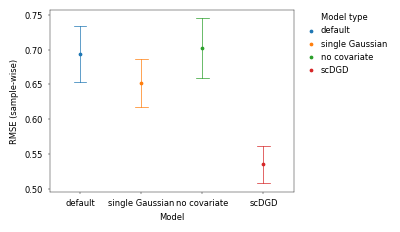

In [5]:
# plot the errors by model as point plot with standard error

# new figure
fig = plt.figure(figsize=(8 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 1)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="model",
    y="rmse",
    data=prediction_errors,
    hue="model",
    #palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("RMSE (sample-wise)")
ax_list[-1].set_xlabel("Model")
ax_list[-1].legend(
    title="Model type",
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 2,
)
# save
fig.savefig(os.path.join(plot_path, "performance_human_bonemarrow_RMSE_by_model.png"), bbox_inches="tight", dpi=300)

In [30]:
# now look at the BAs of the ATAC data (without the scDGD models)

# load all prediction errors
prediction_errors = pd.DataFrame()
for i, model_name in enumerate(model_descriptors):
    if model_name == "scDGD":
        continue
    temp_df = pd.read_csv(
        result_path
        + data_name
        + "_rs"
        + str(random_seeds[i])
        + "_"
        + model_types[i]
        + "_ncomp"
        + str(n_components[i])
        + "_RMSE-BA_samplewise.csv"
    )
    temp_df["model"] = model_name
    temp_df["rs"] = random_seeds[i]
    prediction_errors = pd.concat([prediction_errors, temp_df])

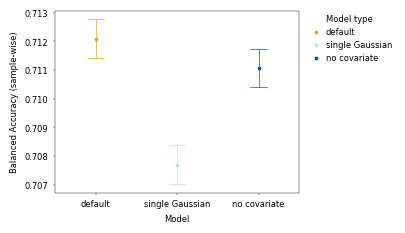

In [31]:
# plot the errors by model as point plot with standard error

# new figure
fig = plt.figure(figsize=(8 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 1)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="model",
    y="ba",
    data=prediction_errors,
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("Balanced Accuracy (sample-wise)")
ax_list[-1].set_xlabel("Model")
ax_list[-1].legend(
    title="Model type",
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 2,
)
# save
fig.savefig(os.path.join(plot_path, "performance_human_bonemarrow_BA_by_model.png"), bbox_inches="tight", dpi=300)

In [4]:
import anndata as ad

# load data
save_dir = "../results/trained_models/"
data_name = "human_bonemarrow"
adata = ad.read_h5ad("../../data/" + data_name + ".h5ad")
adata.X = adata.layers["counts"]
train_indices = list(np.where(adata.obs["train_val_test"] == "train")[0])
test_indices = list(np.where(adata.obs["train_val_test"] == "test")[0])
trainset = adata[train_indices, :].copy()
adata = None

loading model human_bonemarrow_l20_h3_rs0_scDGD_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu
printing all checkpoint keys containing 'correction'
#######################
Training status
#######################
True
loading model human_bonemarrow_l20_h3_rs37_scDGD_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu
printing all checkpoint keys containing 'correction'
#######################
Training status
#######################
True
loading model human_bonemarrow_l20_h3_rs8790_scDGD_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu
printing all checkpoint keys containing 'correction'
#######################
Training status
#######################
True


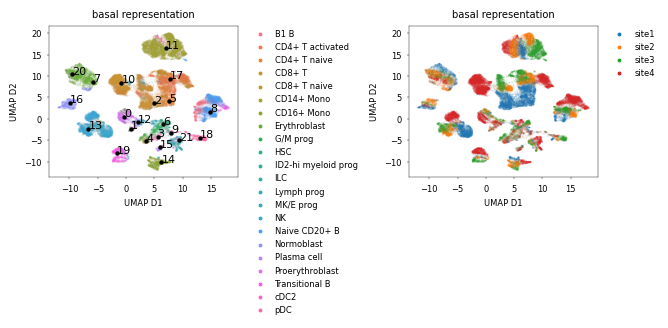

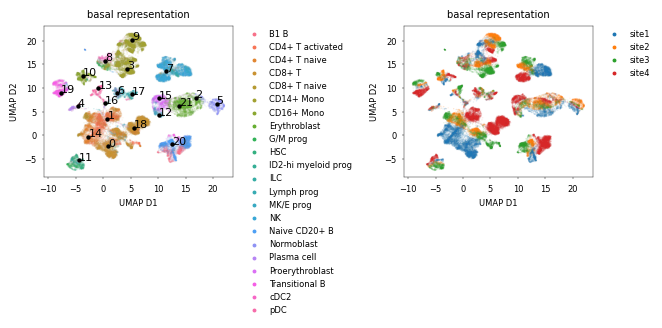

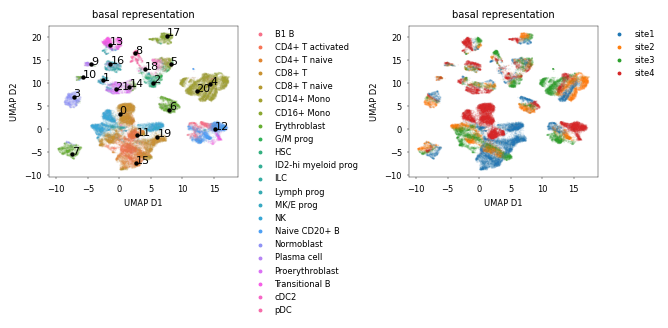

In [7]:
from omicsdgd import DGD

model_names = [
    "human_bonemarrow_l20_h2-3_test50e",
    "human_bonemarrow_l20_h2-3_rs37",
    "human_bonemarrow_l20_h2-3_rs8790",
    "human_bonemarrow_l20_h2-3_rs0_ncomp1_test50e",
    "human_bonemarrow_l20_h2-3_rs37_ncomp1_test50e",
    "human_bonemarrow_l20_h2-3_rs8790_ncomp1_test50e",
    "human_bonemarrow_l20_h2-3_rs0_noCovariate_test50e",
    "human_bonemarrow_l20_h2-3_rs37_noCovariate_test50e",
    "human_bonemarrow_l20_h2-3_rs8790_noCovariate_test50e",
    "human_bonemarrow_l20_h3_rs0_scDGD_test50e",
    "human_bonemarrow_l20_h3_rs37_scDGD_test50e",
    "human_bonemarrow_l20_h3_rs8790_scDGD_test50e"
]

for i, model_name in enumerate(model_names):
    if i < 9:
        continue
    print("loading model " + model_name)
    if model_types[i] == "scDGD":
        if random_seeds[i] == 0:
            modality_switch = 13431
            trainset = trainset[:, :modality_switch]
    model = DGD.load(
        data=trainset, save_dir=save_dir + data_name + "/", model_name=model_name
    )

    # make a plot with 2 subplots
    fig = plt.figure(figsize=(18 * cm, 12 * cm))
    gs = gridspec.GridSpec(2, 2)
    # add spacing
    gs.update(wspace=0.9, hspace=0.4)
    ax_list = []
    ax_list.append(fig.add_subplot(gs[0, 0]))
    # make a umap of the representations
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.5)
    rep = reducer.fit_transform(model.representation.z.detach().cpu().numpy())
    # get the gmm means
    gmm = reducer.transform(model.gmm.mean.detach().cpu().numpy())
    # put the data in a dataframe so I can randomize the order
    rep_df = pd.DataFrame(rep, columns=["UMAP D1", "UMAP D2"])
    rep_df["cell type"] = trainset.obs["cell_type"].values
    rep_df["Site"] = trainset.obs["Site"].values
    rep_df = rep_df.sample(frac=1)
    sns.scatterplot(
        x="UMAP D1",
        y="UMAP D2",
        data=rep_df,
        hue="cell type",
        s=1,
        alpha=alpha,
        linewidth=0,
        ax=ax_list[-1]
    )
    # plot the gmm means
    sns.scatterplot(
        x=gmm[:, 0],
        y=gmm[:, 1],
        s=10,
        color="black",
        alpha=1,
        linewidth=0,
        ax=ax_list[-1]
    )
    ax_list[-1].set_title("basal representation")
    for j in range(gmm.shape[0]):
        ax_list[-1].text(gmm[j, 0], gmm[j, 1], str(j), fontsize=8)
    ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)
    # same plot by covariate
    ax_list.append(fig.add_subplot(gs[0, 1]))
    sns.scatterplot(
        x="UMAP D1",
        y="UMAP D2",
        data=rep_df,
        hue="Site",
        s=1,
        alpha=alpha,
        linewidth=0,
        ax=ax_list[-1]
    )
    ax_list[-1].set_title("basal representation")
    ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)
    if i < 6:
        ax_list.append(fig.add_subplot(gs[1, 1]))
        sns.scatterplot(
            x=model.correction_rep.z.detach().cpu().numpy()[:, 0],
            y=model.correction_rep.z.detach().cpu().numpy()[:, 1],
            hue=trainset.obs["Site"].values,
            s=1,
            alpha=alpha,
            linewidth=0,
            ax=ax_list[-1]
        )
        sns.scatterplot(
            x=model.correction_gmm.mean.detach().cpu().numpy()[:, 0],
            y=model.correction_gmm.mean.detach().cpu().numpy()[:, 1],
            s=10,
            color="black",
            alpha=1,
            linewidth=0,
            ax=ax_list[-1]
        )
        for j in range(model.correction_gmm.n_mix_comp):
            ax_list[-1].text(model.correction_gmm.mean.detach().cpu().numpy()[j, 0], model.correction_gmm.mean.detach().cpu().numpy()[j, 1], str(j), fontsize=8)
        ax_list[-1].set_xlabel("D1")
        ax_list[-1].set_ylabel("D2")
        ax_list[-1].set_title("covariate representation")
        ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)
        ax_list.append(fig.add_subplot(gs[1, 0]))
        sns.scatterplot(
            x=model.correction_rep.z.detach().cpu().numpy()[:, 0],
            y=model.correction_rep.z.detach().cpu().numpy()[:, 1],
            hue=trainset.obs["cell_type"].values,
            s=1,
            alpha=alpha,
            linewidth=0,
            ax=ax_list[-1]
        )
        ax_list[-1].set_xlabel("D1")
        ax_list[-1].set_ylabel("D2")
        ax_list[-1].set_title("covariate representation")
        ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize).remove()
    # save figure
    fig.savefig(os.path.join(plot_path, model_name + "_train_representations.png"), bbox_inches="tight", dpi=300)
    model = None
    

In [5]:
# next evaluate the cell type clustering and average silhouette width of the site in the basal representations for all models
from omicsdgd.functions._metrics import clustering_metric
from sklearn.metrics import silhouette_score, adjusted_rand_score
import scanpy as sc
from sklearn import preprocessing

from omicsdgd import DGD

model_names = [
    "human_bonemarrow_l20_h2-3_test50e",
    "human_bonemarrow_l20_h2-3_rs37",
    "human_bonemarrow_l20_h2-3_rs8790",
    "human_bonemarrow_l20_h2-3_rs0_ncomp1_test50e",
    "human_bonemarrow_l20_h2-3_rs37_ncomp1_test50e",
    "human_bonemarrow_l20_h2-3_rs8790_ncomp1_test50e",
    "human_bonemarrow_l20_h2-3_rs0_noCovariate_test50e",
    "human_bonemarrow_l20_h2-3_rs37_noCovariate_test50e",
    "human_bonemarrow_l20_h2-3_rs8790_noCovariate_test50e",
    "human_bonemarrow_l20_h3_rs0_scDGD_test50e",
    "human_bonemarrow_l20_h3_rs37_scDGD_test50e",
    "human_bonemarrow_l20_h3_rs8790_scDGD_test50e"
]

clustering_df = pd.DataFrame(columns=["model", "silhouette", "model_name", "ARI (GMM)", "ARI (Leiden)"])

for i, model_name in enumerate(model_names):
    print("loading model " + model_name)
    if model_types[i] == "scDGD":
        if random_seeds[i] == 0:
            modality_switch = 13431
            trainset = trainset[:, :modality_switch]
    model = DGD.load(
        data=trainset, save_dir=save_dir + data_name + "/", model_name=model_name
    )

    asw = silhouette_score(model.representation.z.detach().cpu(), trainset.obs["Site"].values)
    ari = clustering_metric(model.representation, model.gmm, trainset.obs["cell_type"].values)

    trainset.obsm['latent'] = model.representation.z.detach().cpu().numpy()
    sc.pp.neighbors(trainset, use_rep='latent', n_neighbors=15) # default
    sc.tl.leiden(trainset, key_added='clusters', resolution=1) # default
    n_clusters = len(np.unique(trainset.obs['clusters'].values))
    le = preprocessing.LabelEncoder()
    le.fit(trainset.obs['cell_type'].values)
    true_labels = le.transform(trainset.obs['cell_type'].values)
    cluster_labels = trainset.obs['clusters'].values.astype(int)
    ari_leiden = adjusted_rand_score(true_labels, np.asarray(cluster_labels))
    print(model_name, asw, ari)

    clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)
    
    model = None

# save the dataframe
clustering_df.to_csv(os.path.join(result_path, "human_bonemarrow_clustering_metrics_2.csv"))

loading model human_bonemarrow_l20_h2-3_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu

        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 4
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
correction_test_rep.z
#######################
Training status
#######################
True
human_bonemarrow_l20_h2-3_test50e -0.06146073 0.6472531789980008
loading model human_bonemarrow_l20_h2-3_rs37
CUDA Available: False
Number of GPUs: 0
using device:  cpu


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)



        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 4
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
correction_test_rep.z
#######################
Training status
#######################
True
human_bonemarrow_l20_h2-3_rs37 -0.05920485 0.5698672053335025
loading model human_bonemarrow_l20_h2-3_rs8790
CUDA Available: False
Number of GPUs: 0
using device:  cpu


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)



        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 4
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
correction_test_rep.z
#######################
Training status
#######################
True
human_bonemarrow_l20_h2-3_rs8790 -0.05756486 0.6414866282675186
loading model human_bonemarrow_l20_h2-3_rs0_ncomp1_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)



        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 4
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
correction_test_rep.z
#######################
Training status
#######################
True
human_bonemarrow_l20_h2-3_rs0_ncomp1_test50e -0.027471261 0.0
loading model human_bonemarrow_l20_h2-3_rs37_ncomp1_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)



        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 4
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
correction_test_rep.z
#######################
Training status
#######################
True
human_bonemarrow_l20_h2-3_rs37_ncomp1_test50e -0.019633716 0.0
loading model human_bonemarrow_l20_h2-3_rs8790_ncomp1_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)



        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 4
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
correction_test_rep.z
#######################
Training status
#######################
True
human_bonemarrow_l20_h2-3_rs8790_ncomp1_test50e -0.019871578 0.0
loading model human_bonemarrow_l20_h2-3_rs0_noCovariate_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)


printing all checkpoint keys containing 'correction'
#######################
Training status
#######################
True
human_bonemarrow_l20_h2-3_rs0_noCovariate_test50e -0.041310363 0.522076089869218
loading model human_bonemarrow_l20_h2-3_rs37_noCovariate_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)


printing all checkpoint keys containing 'correction'
#######################
Training status
#######################
True
human_bonemarrow_l20_h2-3_rs37_noCovariate_test50e -0.047740396 0.5868080701023685
loading model human_bonemarrow_l20_h2-3_rs8790_noCovariate_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)


printing all checkpoint keys containing 'correction'
#######################
Training status
#######################
True
human_bonemarrow_l20_h2-3_rs8790_noCovariate_test50e -0.04458166 0.528835651260277
loading model human_bonemarrow_l20_h3_rs0_scDGD_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)


printing all checkpoint keys containing 'correction'
#######################
Training status
#######################
True
human_bonemarrow_l20_h3_rs0_scDGD_test50e -0.025231127 0.6335185101430216
loading model human_bonemarrow_l20_h3_rs37_scDGD_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)


printing all checkpoint keys containing 'correction'
#######################
Training status
#######################
True
human_bonemarrow_l20_h3_rs37_scDGD_test50e -0.019185793 0.5724823261295492
loading model human_bonemarrow_l20_h3_rs8790_scDGD_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)


printing all checkpoint keys containing 'correction'
#######################
Training status
#######################
True
human_bonemarrow_l20_h3_rs8790_scDGD_test50e -0.022549385 0.46329290872113366


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)


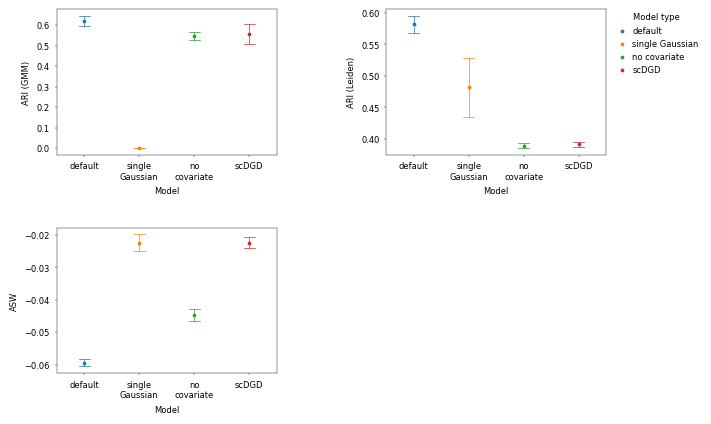

In [16]:
# load the dataframe and make a pointplot

clustering_df = pd.read_csv(os.path.join(result_path, "human_bonemarrow_clustering_metrics_2.csv"))

# new figure
fig = plt.figure(figsize=(18 * cm, 12 * cm))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.5, hspace=0.5)
ax_list = []
ax_list.append(fig.add_subplot(gs[1, 0]))
sns.pointplot(
    x="model",
    y="silhouette",
    data=clustering_df,
    hue="model",
    #palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
# insert line breaks into x tick labels
labels = ax_list[-1].get_xticklabels()
new_labels = []
for label in labels:
    new_labels.append(label.get_text().replace(" ", "\n"))
ax_list[-1].set_xticklabels(new_labels)
ax_list[-1].set_ylabel("ASW")
ax_list[-1].set_xlabel("Model")
ax_list[-1].legend().remove()
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="model",
    y="ARI (GMM)",
    data=clustering_df,
    hue="model",
    #palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_xticklabels(new_labels)
ax_list[-1].set_ylabel("ARI (GMM)")
ax_list[-1].set_xlabel("Model")
ax_list[-1].legend().remove()
ax_list.append(fig.add_subplot(gs[0, 1]))
sns.pointplot(
    x="model",
    y="ARI (Leiden)",
    data=clustering_df,
    hue="model",
    #palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_xticklabels(new_labels)
ax_list[-1].set_ylabel("ARI (Leiden)")
ax_list[-1].set_xlabel("Model")
ax_list[-1].legend(
    title="Model type",
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 2,
)
# save
fig.savefig(os.path.join(plot_path, "performance_human_bonemarrow_clustering_metrics.png"), bbox_inches="tight", dpi=300)

### feature-wise and sample-wise performance

In [3]:
# compare performance between normal multiDGD, multiDGD with a single Gaussian, multiDGD without covariate modeling, and scDGD

random_seeds = [0, 37, 8790]
model_types = ["", "", ""]
n_components = [22, 22, 22]
model_descriptors = ["default", "default", "default"]
n_features_bm = 129921
modality_switch = 13431

data_name = "human_bonemarrow"
result_path = "../results/revision/analysis/batch_integration/" + data_name + "/"
plot_path = "../results/revision/plots/" + data_name + "/"

In [4]:
import anndata as ad
data_name = "human_bonemarrow"
data = ad.read_h5ad("../../data/" + data_name + ".h5ad")
data.X = data.layers["counts"]
# get test indices
test_indices = list(np.where(data.obs["train_val_test"] == "test")[0])
celltypes = data.obs["cell_type"].values[test_indices]
# get the mean expression of the features
mean_expression = data.X.mean(axis=0)
mean_expression_cell = data.X[test_indices,:].sum(axis=1)

In [5]:
mean_expression_cell = data.X[test_indices,:].sum(axis=1)

In [6]:
test_indices = list(np.where(data.obs["train_val_test"] == "test")[0])
celltypes = data.obs["cell_type"].values[test_indices]
# get the mean expression of the features
mean_expression = np.asarray(data.X.mean(axis=0)).flatten()

In [7]:
fraction_pos = data.X[:,modality_switch:].nnz / (data.X.shape[0] * data.X[:,modality_switch:].shape[1])
print(fraction_pos)

0.030785650582849974


In [9]:
# what is the average fraction of values in the ATAC data (per sample)?

# get nnz per row
row_ids = data.X[:,modality_switch:].nonzero()[0]
unique, counts = np.unique(row_ids, return_counts=True)
avg_fraction_per_sample = np.mean(counts) / (data.X.shape[1]-modality_switch)
print(avg_fraction_per_sample)

0.03078565058284997


In [12]:
# load all prediction errors
prediction_errors_sample = pd.DataFrame()
for i, model_name in enumerate(model_descriptors):
    temp_df = pd.read_csv(
        result_path
        + data_name
        + "_rs"
        + str(random_seeds[i])
        + "_"
        + model_types[i]
        + "_ncomp"
        + str(n_components[i])
        + "_errors_samplewise.csv"
    )
    temp_df["rs"] = random_seeds[i]
    temp_df["celltype"] = celltypes
    temp_df["count depth"] = mean_expression_cell
    prediction_errors_sample = pd.concat([prediction_errors_sample, temp_df])
prediction_errors_sample["error"] = prediction_errors_sample["rna_mean"].values + prediction_errors_sample["atac_mean"].values

In [13]:
# load all prediction errors
prediction_metrics_sample = pd.DataFrame()
for i, model_name in enumerate(model_descriptors):
    temp_df = pd.read_csv(
        result_path
        + data_name
        + "_rs"
        + str(random_seeds[i])
        + "_"
        + model_types[i]
        + "_ncomp"
        + str(n_components[i])
        + "_RMSE-BA_samplewise.csv"
    )
    # only keep columns rmse and batch
    temp_df["rs"] = random_seeds[i]
    temp_df["celltype"] = celltypes
    temp_df["count depth"] = mean_expression_cell
    temp_df["Model"] = "multiDGD"
    prediction_metrics_sample = pd.concat([prediction_metrics_sample, temp_df])
    # also load mvi
    temp_df = pd.read_csv(
        result_path
        + data_name
        + "_rs"
        + str(random_seeds[i])
        + "_RMSE-BA_samplewise_mvi.csv"
    )
    temp_df["rs"] = random_seeds[i]
    temp_df["celltype"] = celltypes
    temp_df["count depth"] = mean_expression_cell
    temp_df["Model"] = "MultiVI"
    prediction_metrics_sample = pd.concat([prediction_metrics_sample, temp_df])

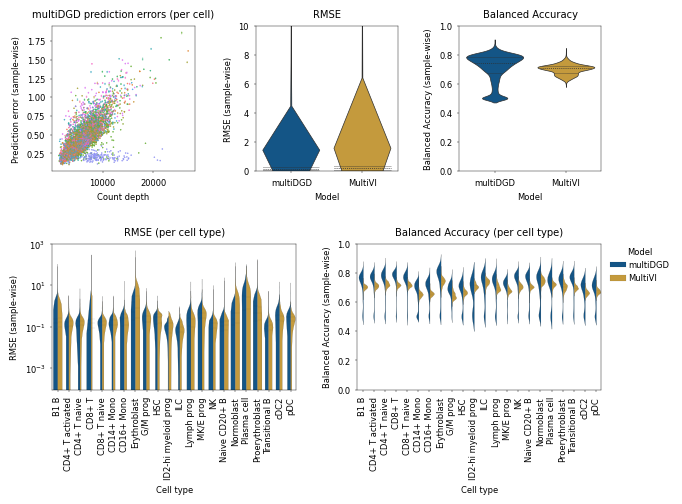

In [17]:
# make a gridspec figure with 2 rows and 3 columns

fig = plt.figure(figsize=(18 * cm, 12 * cm))
gs = gridspec.GridSpec(2, 6)
# add spacing
gs.update(wspace=1.5, hspace=0.5)
ax_list = []

# in the first row, we plot the distribution of the prediction errors, RMSE and BA per subplot as violinplots
# first the prediction errors
ax_list.append(fig.add_subplot(gs[0, 0:2]))
sns.scatterplot(
    x="count depth",
    y="error",
    hue="celltype",
    data=prediction_errors_sample,
    ax=ax_list[-1],
    s=1,
    alpha=0.5,
    linewidth=0,
)
# remove legend
ax_list[-1].get_legend().remove()
#ax_list[-1].set_yscale("log")
ax_list[-1].set_ylabel("Prediction error (sample-wise)")
ax_list[-1].set_xlabel("Count depth")
#ax_list[-1].set_xlabel("Model")
ax_list[-1].set_title("multiDGD prediction errors (per cell)")
# now the RMSE
ax_list.append(fig.add_subplot(gs[0, 2:4]))
sns.violinplot(
    x="Model",
    y="rmse",
    data=prediction_metrics_sample,
    ax=ax_list[-1],
    scale="width",
    inner="quartile",
    linewidth=0.5,
    palette=palette_3colrs,
)
# log scale
#ax_list[-1].set_yscale("log")
ax_list[-1].set_ylim(0, 10)
ax_list[-1].set_ylabel("RMSE (sample-wise)")
#ax_list[-1].set_xlabel("Model")
ax_list[-1].set_title("RMSE")
# now the BA
ax_list.append(fig.add_subplot(gs[0, 4:]))
sns.violinplot(
    x="Model",
    y="ba",
    data=prediction_metrics_sample,
    ax=ax_list[-1],
    scale="width",
    inner="quartile",
    linewidth=0.5,
    palette=palette_3colrs,
)
# limit 0,1
ax_list[-1].set_ylim(0, 1)
ax_list[-1].set_ylabel("Balanced Accuracy (sample-wise)")
#ax_list[-1].set_xlabel("Model")
ax_list[-1].set_title("Balanced Accuracy")

# in the second row, we plot the RMSE and BA as violinplots over cell types
# first the RMSE
ax_list.append(fig.add_subplot(gs[1, 0:3]))
# make these violin plots half for the different models
sns.violinplot(
    x="celltype",
    y="rmse",
    data=prediction_metrics_sample,
    hue="Model",
    split=True,
    ax=ax_list[-1],
    scale="width",
    inner="quartile",
    linewidth=0.1,
    palette=palette_3colrs,
)
#ax_list[-1].set_ylim(0, 50)
ax_list[-1].set_yscale("log")
ax_list[-1].set_ylabel("RMSE (sample-wise)")
ax_list[-1].set_xlabel("Cell type")
ax_list[-1].set_xticklabels(ax_list[-1].get_xticklabels(), rotation=90)
ax_list[-1].set_title("RMSE (per cell type)")
# remove legend
ax_list[-1].get_legend().remove()
# now the BA
ax_list.append(fig.add_subplot(gs[1, 3:]))
sns.violinplot(
    x="celltype",
    y="ba",
    data=prediction_metrics_sample,
    hue="Model",
    split=True,
    ax=ax_list[-1],
    scale="width",
    inner="quartile",
    linewidth=0.1,
    palette=palette_3colrs,
)
ax_list[-1].set_ylim(0, 1)
ax_list[-1].set_ylabel("Balanced Accuracy (sample-wise)")
ax_list[-1].set_xlabel("Cell type")
ax_list[-1].set_xticklabels(ax_list[-1].get_xticklabels(), rotation=90)
ax_list[-1].set_title("Balanced Accuracy (per cell type)")
# set legend in the right lower corner
ax_list[-1].legend(
    title="Model",
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 2,
)

# save
fig.savefig(os.path.join(plot_path, "performance_human_bonemarrow_samplewise.png"), bbox_inches="tight", dpi=300)

In [14]:
# make grouped statistics (mean and standard error) for ba, auprc, spearman

n_samples = prediction_metrics_sample.groupby(["Model"]).size().values[0]

summary_stats_sample = prediction_metrics_sample.groupby(["Model"]).agg(
    mean_ba=("ba", "mean"),
    std_ba=("ba", "std"),
    mean_rmse=("rmse", "mean"),
    std_rmse=("rmse", "std"),
    mean_auprc=("auprc", "mean"),
    std_auprc=("auprc", "std"),
    mean_spearman=("spearman", "mean"),
    std_spearman=("spearman", "std"),
)

# make new columns for sem
summary_stats_sample["sem_ba"] = summary_stats_sample["std_ba"] / np.sqrt(n_samples)
summary_stats_sample["sem_rmse"] = summary_stats_sample["std_rmse"] / np.sqrt(n_samples)
summary_stats_sample["sem_auprc"] = summary_stats_sample["std_auprc"] / np.sqrt(n_samples)
summary_stats_sample["sem_spearman"] = summary_stats_sample["std_spearman"] / np.sqrt(n_samples)

In [38]:
summary_stats_sample

,mean_ba,std_ba,mean_rmse,std_rmse,mean_auprc,std_auprc,mean_spearman,std_spearman,sem_ba,sem_rmse,sem_auprc,sem_spearman
Model,,,,,,,,,,,,
MultiVI,0.701418,0.034545,1.289326,11.931970,0.205270,0.103207,0.210803,0.066775,0.000240,0.082783,0.000716,0.000463
multiDGD,0.712097,0.098815,0.693618,5.834468,0.207909,0.104060,0.210706,0.066797,0.000686,0.040479,0.000722,0.000463


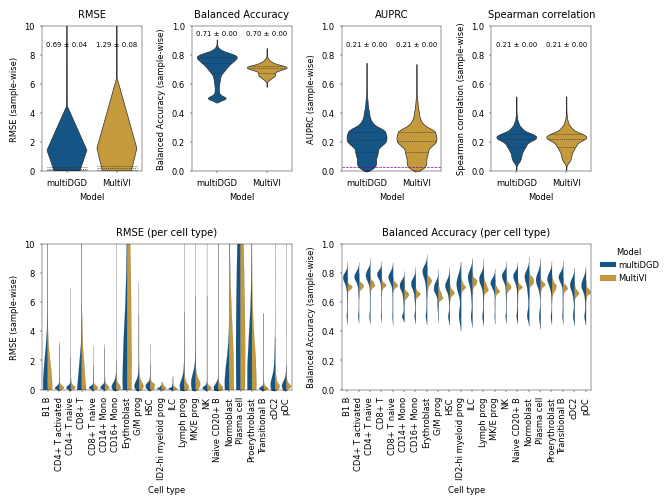

In [37]:
# a figure with 3 subplots, showing the three different metrics for the ATAC test performance

# new figure
fig = plt.figure(figsize=(18 * cm, 12 * cm))
gs = gridspec.GridSpec(2, 4)
# add spacing
gs.update(wspace=0.5, hspace=0.5)

ax_list = []

# RMSE
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.violinplot(
    x="Model",
    y="rmse",
    data=prediction_metrics_sample,
    ax=ax_list[-1],
    scale="width",
    inner="quartile",
    linewidth=0.5,
    palette=palette_3colrs,
)
# print the mean and standard error above the violin plots (go by the order of the models in the plot)
for i, model in enumerate(ax_list[-1].get_xticklabels()):
    model = model.get_text()
    ax_list[-1].text(i, 8.5, f"{summary_stats_sample[summary_stats_sample.index == model]['mean_rmse'].item():.2f} ± {summary_stats_sample[summary_stats_sample.index == model]['sem_rmse'].item():.2f}", ha="center", va="bottom", fontsize=5)
#ax_list[-1].set_yscale("log")
ax_list[-1].set_ylim(0, 10)
ax_list[-1].set_ylabel("RMSE (sample-wise)")
ax_list[-1].set_xlabel("Model")
ax_list[-1].set_title("RMSE")

ax_list.append(fig.add_subplot(gs[0, 1]))
sns.violinplot(
    x="Model",
    y="ba",
    data=prediction_metrics_sample,
    ax=ax_list[-1],
    scale="width",
    inner="quartile",
    linewidth=0.5,
    palette=palette_3colrs,
)
# print the mean and standard error above the violin plots (go by the order of the models in the plot)
for i, model in enumerate(ax_list[-1].get_xticklabels()):
    model = model.get_text()
    ax_list[-1].text(i, 0.93, f"{summary_stats_sample[summary_stats_sample.index == model]['mean_ba'].item():.2f} ± {summary_stats_sample[summary_stats_sample.index == model]['sem_ba'].item():.2f}", ha="center", va="bottom", fontsize=5)
ax_list[-1].set_ylim(0, 1)
ax_list[-1].set_ylabel("Balanced Accuracy (sample-wise)")
ax_list[-1].set_xlabel("Model")
ax_list[-1].set_title("Balanced Accuracy")

# next auprc
ax_list.append(fig.add_subplot(gs[0, 2]))
ax_list[-1].axhline(y=fraction_pos, color="darkmagenta", linestyle="--", linewidth=0.5)
sns.violinplot(
    x="Model",
    y="auprc",
    data=prediction_metrics_sample,
    ax=ax_list[-1],
    scale="width",
    inner="quartile",
    linewidth=0.5,
    palette=palette_3colrs,
)
ax_list[-1].set_ylim(0, 1)
for i, model in enumerate(ax_list[-1].get_xticklabels()):
    model = model.get_text()
    ax_list[-1].text(i, 0.85, f"{summary_stats_sample[summary_stats_sample.index == model]['mean_auprc'].item():.2f} ± {summary_stats_sample[summary_stats_sample.index == model]['sem_auprc'].item():.2f}", ha="center", va="bottom", fontsize=5)
ax_list[-1].set_ylabel("AUPRC (sample-wise)")
ax_list[-1].set_xlabel("Model")
ax_list[-1].set_title("AUPRC")

# next spearman
ax_list.append(fig.add_subplot(gs[0, 3]))
sns.violinplot(
    x="Model",
    y="spearman",
    data=prediction_metrics_sample,
    ax=ax_list[-1],
    scale="width",
    inner="quartile",
    linewidth=0.5,
    palette=palette_3colrs,
)
ax_list[-1].set_ylim(0, 1)
for i, model in enumerate(ax_list[-1].get_xticklabels()):
    model = model.get_text()
    ax_list[-1].text(i, 0.85, f"{summary_stats_sample[summary_stats_sample.index == model]['mean_spearman'].item():.2f} ± {summary_stats_sample[summary_stats_sample.index == model]['sem_spearman'].item():.2f}", ha="center", va="bottom", fontsize=5)
ax_list[-1].set_ylabel("Spearman correlation (sample-wise)")
ax_list[-1].set_xlabel("Model")
ax_list[-1].set_title("Spearman correlation")

# in the second row, we plot the RMSE and BA as violinplots over cell types
# first the RMSE
ax_list.append(fig.add_subplot(gs[1, 0:2]))
# make these violin plots half for the different models
sns.violinplot(
    x="celltype",
    y="rmse",
    data=prediction_metrics_sample,
    hue="Model",
    split=True,
    ax=ax_list[-1],
    scale="width",
    inner="quartile",
    linewidth=0.1,
    palette=palette_3colrs,
)
ax_list[-1].set_ylim(0, 10)
#ax_list[-1].set_yscale("log")
ax_list[-1].set_ylabel("RMSE (sample-wise)")
ax_list[-1].set_xlabel("Cell type")
ax_list[-1].set_xticklabels(ax_list[-1].get_xticklabels(), rotation=90)
ax_list[-1].set_title("RMSE (per cell type)")
# remove legend
ax_list[-1].get_legend().remove()
# now the BA
ax_list.append(fig.add_subplot(gs[1, 2:]))
sns.violinplot(
    x="celltype",
    y="ba",
    data=prediction_metrics_sample,
    hue="Model",
    split=True,
    ax=ax_list[-1],
    scale="width",
    inner="quartile",
    linewidth=0.1,
    palette=palette_3colrs,
)
ax_list[-1].set_ylim(0, 1)
ax_list[-1].set_ylabel("Balanced Accuracy (sample-wise)")
ax_list[-1].set_xlabel("Cell type")
ax_list[-1].set_xticklabels(ax_list[-1].get_xticklabels(), rotation=90)
ax_list[-1].set_title("Balanced Accuracy (per cell type)")
# set legend in the right lower corner
ax_list[-1].legend(
    title="Model",
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 2,
)

# save
fig.savefig(os.path.join(plot_path, "performance_human_bonemarrow_metrics_samplewise2.png"), bbox_inches="tight", dpi=300)

In [15]:
# !!! I don't know how this looks here, need to check first

# load all prediction errors
prediction_errors_gene = pd.DataFrame()
for i, model_name in enumerate(model_descriptors):
    temp_df = pd.read_csv(
        result_path
        + data_name
        + "_rs"
        + str(random_seeds[i])
        + "_"
        + model_types[i]
        + "_ncomp"
        + str(n_components[i])
        + "_errors_genewise.csv"
    )
    temp_df["rs"] = random_seeds[i]
    temp_df["mean"] = mean_expression
    prediction_errors_gene = pd.concat([prediction_errors_gene, temp_df])
#prediction_errors["normalized error"] = prediction_errors["error"] / n_features_bm
prediction_errors_gene["error"] = [prediction_errors_gene["rna_mean"].values[i] if prediction_errors_gene["modality"].values[i] == "rna" else prediction_errors_gene["atac_mean"].values[i] for i in range(prediction_errors_gene.shape[0])]

In [99]:
prediction_errors_gene

,Unnamed: 0,rna_mean,rna_std,rna_se,feature,modality,atac_mean,atac_std,atac_se,rs,mean,error
0,0,0.052120,0.428889,0.005154,AL627309.5,rna,NaN,NaN,NaN,0,0.014498,0.052120
1,1,0.152116,0.652019,0.007835,LINC01409,rna,NaN,NaN,NaN,0,0.048700,0.152116
2,2,0.161626,0.659366,0.007923,LINC01128,rna,NaN,NaN,NaN,0,0.072221,0.161626
3,3,0.188455,0.681650,0.008191,NOC2L,rna,NaN,NaN,NaN,0,0.064499,0.188455
4,4,0.039675,0.416014,0.004999,KLHL17,rna,NaN,NaN,NaN,0,0.009617,0.039675
...,...,...,...,...,...,...,...,...,...,...,...,...
129916,116485,NaN,NaN,NaN,GL000219.1-90062-90937,atac,0.056602,0.610508,0.007336,8790,0.006195,0.056602
129917,116486,NaN,NaN,NaN,GL000219.1-99257-100160,atac,0.938448,1.454267,0.017476,8790,0.192450,0.938448
129918,116487,NaN,NaN,NaN,KI270726.1-27152-28034,atac,0.071946,0.700906,0.008423,8790,0.007220,0.071946
129919,116488,NaN,NaN,NaN,KI270713.1-21434-22336,atac,1.042099,1.466001,0.017617,8790,0.217690,1.042099


In [16]:
# !!! I don't know how this looks here, need to check first

# load all prediction errors
prediction_metrics_gene = pd.DataFrame()
for i, model_name in enumerate(model_descriptors):
    temp_df = pd.read_csv(
        result_path
        + data_name
        + "_rs"
        + str(random_seeds[i])
        + "_"
        + model_types[i]
        + "_ncomp"
        + str(n_components[i])
        + "_RMSE-BA_genewise.csv"
    )
    temp_df["rs"] = random_seeds[i]
    temp_df["mean"] = mean_expression
    temp_df["Model"] = "multiDGD"
    prediction_metrics_gene = pd.concat([prediction_metrics_gene, temp_df])
    temp_df = pd.read_csv(
        result_path
        + data_name
        + "_rs"
        + str(random_seeds[i])
        + "_RMSE-BA_genewise_mvi.csv"
    )
    temp_df["rs"] = random_seeds[i]
    temp_df["mean"] = mean_expression
    temp_df["Model"] = "MultiVI"
    prediction_metrics_gene = pd.concat([prediction_metrics_gene, temp_df])
#prediction_errors["normalized error"] = prediction_errors["error"] / n_features_bm

/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_57607/701493073.py:12: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(


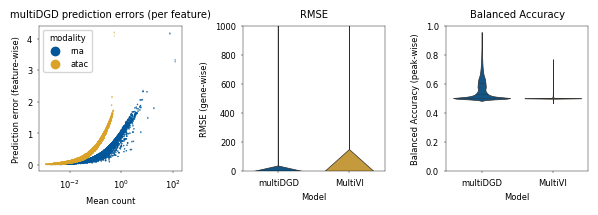

In [104]:
# make a gridspec figure with 2 rows and 3 columns

fig = plt.figure(figsize=(18 * cm, 12 * cm))
gs = gridspec.GridSpec(2, 6)
# add spacing
gs.update(wspace=1.5, hspace=0.5)
ax_list = []

# in the first row, we plot the distribution of the prediction errors, RMSE and BA per subplot as violinplots
# first the prediction errors
ax_list.append(fig.add_subplot(gs[0, 0:2]))
sns.scatterplot(
    x="mean",
    y="error",
    hue="modality",
    data=prediction_errors_gene,
    ax=ax_list[-1],
    s=1,
    alpha=0.5,
    linewidth=0,
    palette=palette_3colrs,
)
# remove legend
#ax_list[-1].get_legend().remove()
ax_list[-1].set_xscale("log")
ax_list[-1].set_ylabel("Prediction error (feature-wise)")
ax_list[-1].set_xlabel("Mean count")
#ax_list[-1].set_xlabel("Model")
ax_list[-1].set_title("multiDGD prediction errors (per feature)")
# now the RMSE
ax_list.append(fig.add_subplot(gs[0, 2:4]))
sns.violinplot(
    x="Model",
    y="rmse",
    data=prediction_metrics_gene,
    ax=ax_list[-1],
    scale="width",
    inner="quartile",
    linewidth=0.5,
    palette=palette_3colrs,
)
# log scale
#ax_list[-1].set_yscale("log")
ax_list[-1].set_ylim(0, 1000)
ax_list[-1].set_ylabel("RMSE (gene-wise)")
#ax_list[-1].set_xlabel("Model")
ax_list[-1].set_title("RMSE")
# now the BA
ax_list.append(fig.add_subplot(gs[0, 4:]))
sns.violinplot(
    x="Model",
    y="ba",
    data=prediction_metrics_gene,
    ax=ax_list[-1],
    scale="width",
    inner="quartile",
    linewidth=0.5,
    palette=palette_3colrs,
)
# limit 0,1
ax_list[-1].set_ylim(0, 1)
ax_list[-1].set_ylabel("Balanced Accuracy (peak-wise)")
#ax_list[-1].set_xlabel("Model")
ax_list[-1].set_title("Balanced Accuracy")

# in the second row, we plot the RMSE and BA as violinplots over cell types
# first the RMSE
"""
ax_list.append(fig.add_subplot(gs[1, 0:3]))
# make these violin plots half for the different models
sns.violinplot(
    x="celltype",
    y="rmse",
    data=prediction_metrics_gene,
    hue="Model",
    split=True,
    ax=ax_list[-1],
    scale="width",
    inner="quartile",
    linewidth=0.1,
    palette=palette_3colrs,
)
#ax_list[-1].set_ylim(0, 50)
ax_list[-1].set_yscale("log")
ax_list[-1].set_ylabel("RMSE (sample-wise)")
ax_list[-1].set_xlabel("Cell type")
ax_list[-1].set_xticklabels(ax_list[-1].get_xticklabels(), rotation=90)
ax_list[-1].set_title("RMSE (per cell type)")
# remove legend
ax_list[-1].get_legend().remove()
# now the BA
ax_list.append(fig.add_subplot(gs[1, 3:]))
sns.violinplot(
    x="celltype",
    y="ba",
    data=prediction_metrics_sample,
    hue="Model",
    split=True,
    ax=ax_list[-1],
    scale="width",
    inner="quartile",
    linewidth=0.1,
    palette=palette_3colrs,
)
ax_list[-1].set_ylim(0, 1)
ax_list[-1].set_ylabel("Balanced Accuracy (sample-wise)")
ax_list[-1].set_xlabel("Cell type")
ax_list[-1].set_xticklabels(ax_list[-1].get_xticklabels(), rotation=90)
ax_list[-1].set_title("Balanced Accuracy (per cell type)")
# set legend in the right lower corner
ax_list[-1].legend(
    title="Model",
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 2,
)
"""

# save
fig.savefig(os.path.join(plot_path, "performance_human_bonemarrow_genewise.png"), bbox_inches="tight", dpi=300)

In [17]:
# make grouped statistics (mean and standard error) for ba, auprc, spearman

n_features = prediction_metrics_gene.groupby(["Model"]).size().values[0]

summary_stats_gene = prediction_metrics_gene.groupby(["Model"]).agg(
    mean_ba=("ba", "mean"),
    std_ba=("ba", "std"),
    mean_rmse=("rmse", "mean"),
    std_rmse=("rmse", "std"),
    mean_auprc=("auprc", "mean"),
    std_auprc=("auprc", "std"),
    mean_spearman=("spearman", "mean"),
    std_spearman=("spearman", "std"),
)

# make new columns for sem
summary_stats_gene["sem_ba"] = summary_stats_gene["std_ba"] / np.sqrt(n_features)
summary_stats_gene["sem_rmse"] = summary_stats_gene["std_rmse"] / np.sqrt(n_features)
summary_stats_gene["sem_auprc"] = summary_stats_gene["std_auprc"] / np.sqrt(n_features)
summary_stats_gene["sem_spearman"] = summary_stats_gene["std_spearman"] / np.sqrt(n_features)

In [18]:
rna_bins, rna_bin_ranges = pd.qcut(prediction_metrics_gene[prediction_metrics_gene["feature"]=="rna"]["mean"], q=10, labels=False, retbins=True)
atac_bins, atac_bin_ranges = pd.qcut(prediction_metrics_gene[prediction_metrics_gene["feature"]=="atac"]["mean"], q=10, labels=False, retbins=True)
prediction_metrics_gene["mean_bin"] = 0
prediction_metrics_gene.loc[prediction_metrics_gene["feature"]=="rna", "mean_bin"] = rna_bins
prediction_metrics_gene.loc[prediction_metrics_gene["feature"]=="atac", "mean_bin"] = atac_bins

In [42]:
prediction_metrics_gene

,Unnamed: 0,rmse,feature_name,feature,tpr,tnr,ba,auprc,spearman,rs,mean,Model,mean_bin
0,0,0.010936,AL627309.5,rna,NaN,NaN,NaN,NaN,NaN,0,0.014498,multiDGD,5
1,1,0.041109,LINC01409,rna,NaN,NaN,NaN,NaN,NaN,0,0.048700,multiDGD,8
2,2,0.050603,LINC01128,rna,NaN,NaN,NaN,NaN,NaN,0,0.072221,multiDGD,8
3,3,0.057029,NOC2L,rna,NaN,NaN,NaN,NaN,NaN,0,0.064499,multiDGD,8
4,4,0.007264,KLHL17,rna,NaN,NaN,NaN,NaN,NaN,0,0.009617,multiDGD,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129916,116485,NaN,GL000219.1-90062-90937,atac,1.0,0.004067,0.502033,0.017663,0.075694,8790,0.006195,MultiVI,2
129917,116486,NaN,GL000219.1-99257-100160,atac,1.0,0.000000,0.500000,0.263213,0.143075,8790,0.192450,MultiVI,9
129918,116487,NaN,KI270726.1-27152-28034,atac,1.0,0.000145,0.500073,0.018683,0.050876,8790,0.007220,MultiVI,2
129919,116488,NaN,KI270713.1-21434-22336,atac,1.0,0.000000,0.500000,0.309320,0.195396,8790,0.217690,MultiVI,9


In [17]:
mean_rna = prediction_metrics_gene[prediction_metrics_gene["feature"]=="rna"]["mean"].mean()
mean_atac = prediction_metrics_gene[prediction_metrics_gene["feature"]=="atac"]["mean"].mean()

/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_69962/1860502374.py:113: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax_list[-1].set_ylim(0, 100)


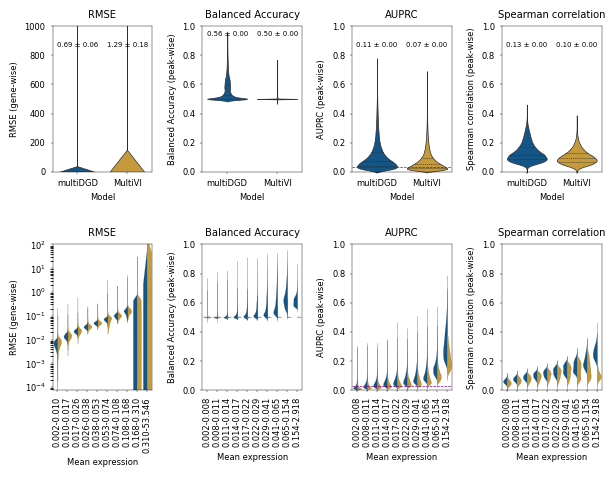

In [38]:
# a figure with 3 subplots, showing the three different metrics for the ATAC test performance

# new figure
fig = plt.figure(figsize=(18 * cm, 12 * cm))
gs = gridspec.GridSpec(2, 4)
# add spacing
gs.update(wspace=0.5, hspace=0.5)

ax_list = []

# RMSE
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.violinplot(
    x="Model",
    y="rmse",
    data=prediction_metrics_gene,
    ax=ax_list[-1],
    scale="width",
    inner="quartile",
    linewidth=0.5,
    palette=palette_3colrs,
)
# print the mean and standard error above the violin plots (go by the order of the models in the plot)
for i, model in enumerate(ax_list[-1].get_xticklabels()):
    model = model.get_text()
    ax_list[-1].text(i, 850, f"{summary_stats_gene[summary_stats_gene.index == model]['mean_rmse'].item():.2f} ± {summary_stats_gene[summary_stats_gene.index == model]['sem_rmse'].item():.2f}", ha="center", va="bottom", fontsize=5)
#ax_list[-1].set_yscale("log")
ax_list[-1].set_ylim(0, 1000)
ax_list[-1].set_ylabel("RMSE (gene-wise)")
ax_list[-1].set_xlabel("Model")
ax_list[-1].set_title("RMSE")

ax_list.append(fig.add_subplot(gs[0, 1]))
sns.violinplot(
    x="Model",
    y="ba",
    data=prediction_metrics_gene,
    ax=ax_list[-1],
    scale="width",
    inner="quartile",
    linewidth=0.5,
    palette=palette_3colrs,
)
# print the mean and standard error above the violin plots (go by the order of the models in the plot)
for i, model in enumerate(ax_list[-1].get_xticklabels()):
    model = model.get_text()
    ax_list[-1].text(i, 0.93, f"{summary_stats_gene[summary_stats_gene.index == model]['mean_ba'].item():.2f} ± {summary_stats_gene[summary_stats_gene.index == model]['sem_ba'].item():.2f}", ha="center", va="bottom", fontsize=5)
ax_list[-1].set_ylim(0, 1)
ax_list[-1].set_ylabel("Balanced Accuracy (peak-wise)")
ax_list[-1].set_xlabel("Model")
ax_list[-1].set_title("Balanced Accuracy")

# next auprc
ax_list.append(fig.add_subplot(gs[0, 2]))
ax_list[-1].axhline(y=fraction_pos, color="darkmagenta", linestyle="--", linewidth=0.5)
sns.violinplot(
    x="Model",
    y="auprc",
    data=prediction_metrics_gene,
    ax=ax_list[-1],
    scale="width",
    inner="quartile",
    linewidth=0.5,
    palette=palette_3colrs,
)
ax_list[-1].set_ylim(0, 1)
for i, model in enumerate(ax_list[-1].get_xticklabels()):
    model = model.get_text()
    ax_list[-1].text(i, 0.85, f"{summary_stats_gene[summary_stats_gene.index == model]['mean_auprc'].item():.2f} ± {summary_stats_gene[summary_stats_gene.index == model]['sem_auprc'].item():.2f}", ha="center", va="bottom", fontsize=5)
ax_list[-1].set_ylabel("AUPRC (peak-wise)")
ax_list[-1].set_xlabel("Model")
ax_list[-1].set_title("AUPRC")

# next spearman
ax_list.append(fig.add_subplot(gs[0, 3]))
sns.violinplot(
    x="Model",
    y="spearman",
    data=prediction_metrics_gene,
    ax=ax_list[-1],
    scale="width",
    inner="quartile",
    linewidth=0.5,
    palette=palette_3colrs,
)
ax_list[-1].set_ylim(0, 1)
for i, model in enumerate(ax_list[-1].get_xticklabels()):
    model = model.get_text()
    ax_list[-1].text(i, 0.85, f"{summary_stats_gene[summary_stats_gene.index == model]['mean_spearman'].item():.2f} ± {summary_stats_gene[summary_stats_gene.index == model]['sem_spearman'].item():.2f}", ha="center", va="bottom", fontsize=5)
ax_list[-1].set_ylabel("Spearman correlation (peak-wise)")
ax_list[-1].set_xlabel("Model")
ax_list[-1].set_title("Spearman correlation")

# below add a row where each of the metrics is plotted against the mean expression of the features
# first the BA
ax_list.append(fig.add_subplot(gs[1, 0]))
# plot the RMSE as violinplots over the mean expression of the features (as bins)
sns.violinplot(
    x="mean_bin",
    y="rmse",
    data=prediction_metrics_gene,
    hue="Model",
    split=True,
    ax=ax_list[-1],
    scale="width",
    inner="quartile",
    linewidth=0.1,
    palette=palette_3colrs,
)
# set xticklabels to rna_bin_ranges
ax_list[-1].set_xticklabels([f"{rna_bin_ranges[i]:.3f}-{rna_bin_ranges[i+1]:.3f}" for i in range(len(rna_bin_ranges)-1)], rotation=90)
ax_list[-1].set_yscale("log")
ax_list[-1].set_ylim(0, 100)
ax_list[-1].set_ylabel("RMSE (gene-wise)")
ax_list[-1].set_xlabel("Mean expression")
ax_list[-1].set_title("RMSE")
ax_list[-1].get_legend().remove()

# next the BA
ax_list.append(fig.add_subplot(gs[1, 1]))
sns.violinplot(
    x="mean_bin",
    y="ba",
    data=prediction_metrics_gene,
    hue="Model",
    split=True,
    ax=ax_list[-1],
    scale="width",
    inner="quartile",
    linewidth=0.1,
    palette=palette_3colrs,
)
# set xticklabels to atac_bin_ranges
ax_list[-1].set_xticklabels([f"{atac_bin_ranges[i]:.3f}-{atac_bin_ranges[i+1]:.3f}" for i in range(len(atac_bin_ranges)-1)], rotation=90)
ax_list[-1].set_ylim(0, 1)
ax_list[-1].set_ylabel("Balanced Accuracy (peak-wise)")
ax_list[-1].set_xlabel("Mean expression")
ax_list[-1].set_title("Balanced Accuracy")
ax_list[-1].get_legend().remove()

# next the AUPRC
ax_list.append(fig.add_subplot(gs[1, 2]))
ax_list[-1].axhline(y=fraction_pos, color="darkmagenta", linestyle="--", linewidth=0.5)
sns.violinplot(
    x="mean_bin",
    y="auprc",
    data=prediction_metrics_gene,
    hue="Model",
    split=True,
    ax=ax_list[-1],
    scale="width",
    inner="quartile",
    linewidth=0.1,
    palette=palette_3colrs,
)
ax_list[-1].set_xticklabels([f"{atac_bin_ranges[i]:.3f}-{atac_bin_ranges[i+1]:.3f}" for i in range(len(atac_bin_ranges)-1)], rotation=90)
ax_list[-1].set_ylim(0, 1)
ax_list[-1].set_ylabel("AUPRC (peak-wise)")
ax_list[-1].set_xlabel("Mean expression")
ax_list[-1].set_title("AUPRC")
ax_list[-1].get_legend().remove()

# next the Spearman correlation
ax_list.append(fig.add_subplot(gs[1, 3]))
ax_list[-1].axhline(y=0.0, color="darkmagenta", linestyle="--", linewidth=0.5)
sns.violinplot(
    x="mean_bin",
    y="spearman",
    data=prediction_metrics_gene,
    hue="Model",
    split=True,
    ax=ax_list[-1],
    scale="width",
    inner="quartile",
    linewidth=0.1,
    palette=palette_3colrs,
)
ax_list[-1].set_xticklabels([f"{atac_bin_ranges[i]:.3f}-{atac_bin_ranges[i+1]:.3f}" for i in range(len(atac_bin_ranges)-1)], rotation=90)
ax_list[-1].set_ylim(0, 1)
ax_list[-1].set_ylabel("Spearman correlation (peak-wise)")
ax_list[-1].set_xlabel("Mean expression")
ax_list[-1].set_title("Spearman correlation")
ax_list[-1].get_legend().remove()

# save
fig.savefig(os.path.join(plot_path, "performance_human_bonemarrow_atac_metrics_genewise.png"), bbox_inches="tight", dpi=300)

### auprc and spearman

In [3]:
# compare performance between normal multiDGD, multiDGD with a single Gaussian, multiDGD without covariate modeling, and scDGD

random_seeds = [0, 37, 8790]*3
data_names = ["human_bonemarrow"]*3 + ["mouse_gastrulation"]*3 + ["human_brain"]*3
n_components = [22, 22, 22, 37, 37, 37, 16, 16, 16]

In [8]:
for i,data_name in enumerate(data_names):
    result_path = "../results/revision/analysis/batch_integration/" + data_name + "/"
    plot_path = "../results/revision/plots/" + data_name + "/"

    # first load multiDGD results
    temp_df = pd.read_csv(
        result_path
        + data_name
        + "_rs"
        + str(random_seeds[i])
        + "__ncomp"
        + str(n_components[i])
        + "_auprc_spearman.csv"
    )
    temp_df["Model"] = "multiDGD"
    temp_df["rs"] = random_seeds[i]
    temp_df["Data"] = data_name

    if i == 0:
        df_a_s = temp_df
    else:
        df_a_s = pd.concat([df_a_s, temp_df])
    
    # load MultiVI results
    temp_df = pd.read_csv(
        result_path
        + data_name
        + "_rs"
        + str(random_seeds[i])
        + "_auprc_spearman_mvi.csv"
    )
    temp_df["Model"] = "MultiVI"
    temp_df["rs"] = random_seeds[i]
    temp_df["Data"] = data_name

    df_a_s = pd.concat([df_a_s, temp_df])

In [9]:
df_a_s

,Unnamed: 0,auprc,spearman,spearman_rna,Model,rs,Data
0,0,0.279039,0.237678,0.359217,multiDGD,0,human_bonemarrow
0,0,0.258541,0.236714,NaN,MultiVI,0,human_bonemarrow
0,0,0.279453,0.237882,0.359882,multiDGD,37,human_bonemarrow
0,0,0.256506,0.236317,NaN,MultiVI,37,human_bonemarrow
0,0,0.279408,0.237868,0.359669,multiDGD,8790,human_bonemarrow
0,0,0.260815,0.237126,NaN,MultiVI,8790,human_bonemarrow
0,0,0.493815,0.395258,0.636973,multiDGD,0,mouse_gastrulation
0,0,0.436381,0.380514,NaN,MultiVI,0,mouse_gastrulation
0,0,0.493875,0.395320,0.637323,multiDGD,37,mouse_gastrulation
0,0,0.434711,0.380593,NaN,MultiVI,37,mouse_gastrulation


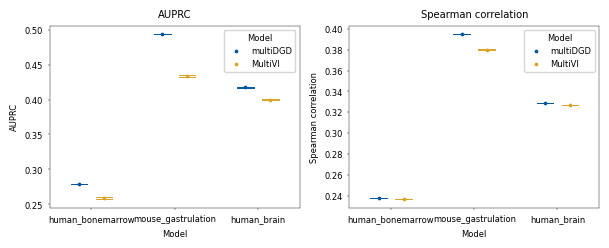

In [13]:
# make a pointplot for the AUPRC and Spearman correlation

fig = plt.figure(figsize=(18 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 2)

ax_list = []

# AUPRC
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="Data",
    y="auprc",
    hue="Model",
    data=df_a_s,
    ax=ax_list[-1],
    palette=palette_3colrs,
    errorbar="se",
    dodge=0.3,
    markers=".",
    linestyles="",
    scale=pointplot_scale,
    errwidth=pointplot_errwidth,
    capsize=pointplot_capsize,
)
#ax_list[-1].set_ylim(0, 1)
ax_list[-1].set_ylabel("AUPRC")
ax_list[-1].set_xlabel("Model")
ax_list[-1].set_title("AUPRC")

# Spearman
ax_list.append(fig.add_subplot(gs[0, 1]))
sns.pointplot(
    x="Data",
    y="spearman",
    hue="Model",
    data=df_a_s,
    ax=ax_list[-1],
    palette=palette_3colrs,
    errorbar="se",
    dodge=0.3,
    markers=".",
    linestyles="",
    scale=pointplot_scale,
    errwidth=pointplot_errwidth,
    capsize=pointplot_capsize,
)
#ax_list[-1].set_ylim(0, 1)
ax_list[-1].set_ylabel("Spearman correlation")
ax_list[-1].set_xlabel("Model")
ax_list[-1].set_title("Spearman correlation")

plt.show()

## starting with too many components

In [3]:
data_name = "human_bonemarrow"
result_path = "../results/revision/analysis/batch_integration/" + data_name + "/"
plot_path = "../results/revision/plots/" + data_name + "/"

import anndata as ad

# load data
save_dir = "../results/trained_models/"
data_name = "human_bonemarrow"
adata = ad.read_h5ad("../../data/" + data_name + ".h5ad")
adata.X = adata.layers["counts"]
train_indices = list(np.where(adata.obs["train_val_test"] == "train")[0])
test_indices = list(np.where(adata.obs["train_val_test"] == "test")[0])
trainset = adata[train_indices, :].copy()
adata = None

In [4]:
model_name = "human_bonemarrow_l20_h2-3_rs0_ncomp50_adaptive_noCovPrior"

from omicsdgd import DGD
model = DGD.load(
    data=trainset, save_dir=save_dir + data_name + "/", model_name=model_name
)

CUDA Available: False
Number of GPUs: 0
using device:  cpu

        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 4
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
#######################
Training status
#######################
True


In [5]:
# compute the clustering performance
from sklearn import preprocessing
from sklearn.metrics import adjusted_rand_score
from omicsdgd.functions._metrics import clustering_metric

le = preprocessing.LabelEncoder()
le.fit(trainset.obs["cell_type"].values)
true_labels = le.transform(trainset.obs["cell_type"].values)

# get gmm clustering
radj = clustering_metric(model.representation, model.gmm, trainset.obs["cell_type"].values)
print(radj)

0.4788383450970506


In [47]:
# get the gmm weights
weights = torch.softmax(model.gmm.weight.detach().cpu(), 0).numpy()
print(weights)
valid_components = np.where(weights > 0.01)[0]
print(valid_components)

[0.00100184 0.0699054  0.06391577 0.00042219 0.01143685 0.02456964
 0.00880621 0.00595404 0.00707496 0.03165267 0.00251821 0.02294479
 0.07808215 0.0011608  0.00760935 0.02145964 0.01953177 0.02625661
 0.01469574 0.01027581 0.00047098 0.0152745  0.02069824 0.02010432
 0.02319207 0.00019814 0.01433736 0.00740133 0.0014711  0.11082651
 0.00425571 0.00822779 0.00064527 0.07761058 0.00068964 0.04991684
 0.06814604 0.01583336 0.00494768 0.00049377 0.00012886 0.00039307
 0.01393808 0.0005025  0.07836742 0.01660298 0.00148238 0.00090799
 0.0121134  0.00154764]
[ 1  2  4  5  9 11 12 15 16 17 18 19 21 22 23 24 26 29 33 35 36 37 42 44
 45 48]


In [60]:
import torch
labels = trainset.obs["cell_type"].values
r = model.representation
gmm = model.gmm

le = preprocessing.LabelEncoder()
le.fit(labels)
true_labels = le.transform(labels)

In [63]:
# compute probabilities per sample and component (n_sample,n_mix_comp)
probs_per_sample_and_component = gmm.sample_probs(r.z.detach())
# set the probs to zero for the components with low weights
#probs_per_sample_and_component[:, valid_components] = 0
# get index (i.e. component id) of max prob per sample
cluster_labels = torch.max(probs_per_sample_and_component, dim=-1).indices.cpu().detach().numpy()

In [64]:
probs_per_sample_and_component

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 2.6550e+28, 5.0708e+14,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 2.1605e-13, 5.0139e+18,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 1.7257e+26, 2.4455e+03,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]], grad_fn=<ExpBackward0>)

In [65]:
torch.max(probs_per_sample_and_component, dim=-1).indices.cpu().detach().numpy()

array([36,  9,  1, ..., 33,  1, 36])

In [72]:
# make a confusion matrix
conf_mat = np.zeros((len(np.unique(true_labels)), len(np.unique(valid_components))))
not_included = 0
indices_to_include = []
for i in range(len(true_labels)):
    if cluster_labels[i] not in valid_components:
        not_included += 1
    else:
        indices_to_include.append(i)
        conf_mat[true_labels[i], np.where(valid_components == cluster_labels[i])[0]] += 1

print("out of {} samples, {} were not included in the clustering".format(len(true_labels), not_included))
# normalize the confusion matrix
conf_mat = conf_mat / conf_mat.sum(axis=0)

out of 56714 samples, 5132 were not included in the clustering


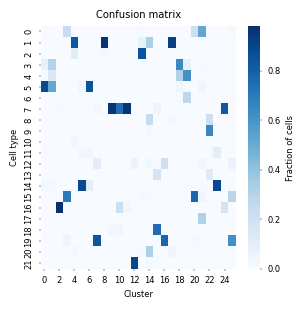

26


In [70]:
# sort the confusion matrix based on maximum values in the diagonal
#conf_mat = conf_mat[:, np.argsort(conf_mat.diagonal())]

# plot the confusion matrix
fig = plt.figure(figsize=(8 * cm, 8 * cm))
gs = gridspec.GridSpec(1, 1)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.heatmap(
    conf_mat,
    cmap="Blues",
    ax=ax_list[-1],
    cbar_kws={"label": "Fraction of cells"},
)
ax_list[-1].set_xlabel("Cluster")
ax_list[-1].set_ylabel("Cell type")
ax_list[-1].set_title("Confusion matrix")
plt.show()

In [73]:
radj = adjusted_rand_score(true_labels[indices_to_include], cluster_labels[indices_to_include])
print(radj)

0.4894812521403786


26


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_72285/3949445051.py:15: RuntimeWarning: invalid value encountered in scalar divide
  conf_mat_combined[i, j] = conf_mat_combined[i, j] / np.sum(most_likely_celltype == j)


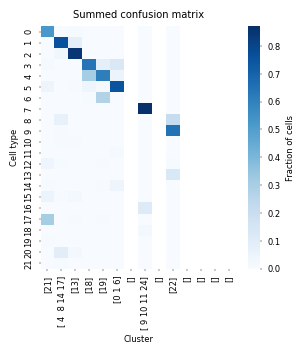

In [84]:
# now assign each cluster the most likely cell type to sum up the heatmap
# get the most likely cell type per cluster
most_likely_celltype = np.argmax(conf_mat, axis=0)
print(len(most_likely_celltype))
cluster_combos = []

conf_mat_combined = np.zeros((len(np.unique(true_labels)), len(np.unique(most_likely_celltype))))
for i in range(len(np.unique(true_labels))):
    for j in range(len(np.unique(most_likely_celltype))):
        # combine the component numbers as strings
        if i == 0:
            cluster_combos.append(str(np.where(most_likely_celltype == j)[0]))
        conf_mat_combined[i, j] = np.sum(conf_mat[i, np.where(most_likely_celltype == j)[0]])
        # normalize by the number of clusters in this cell type
        conf_mat_combined[i, j] = conf_mat_combined[i, j] / np.sum(most_likely_celltype == j)

# plot the confusion matrix
fig = plt.figure(figsize=(8 * cm, 8 * cm))
gs = gridspec.GridSpec(1, 1)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.heatmap(
    conf_mat_combined,
    cmap="Blues",
    ax=ax_list[-1],
    cbar_kws={"label": "Fraction of cells"},
)
ax_list[-1].set_xlabel("Cluster")
# set the xticklabels to the most likely cell type
ax_list[-1].set_xticklabels(cluster_combos, rotation=90)
ax_list[-1].set_ylabel("Cell type")
ax_list[-1].set_title("Summed confusion matrix")
plt.show()

In [75]:
most_likely_celltype

array([ 5,  5, 16, 15,  1, 14,  5, 19,  1,  7,  7,  7, 21,  2,  1, 18, 19,
        1,  3,  4, 15,  0,  9, 14,  7, 19])

In [101]:
# load the effective component number data (csv)

df_effective_components = pd.read_csv(os.path.join(result_dir, "performance/wandb_effective_number_of_components.csv"))
# keep only columns 0, 4, 7
df_effective_components = df_effective_components.iloc[:, [0, 4, 7]]
# change column names
df_effective_components.columns = ["epoch", "empirical", "given"]
# transform to long format
df_effective_components = pd.melt(df_effective_components, id_vars=["epoch"])
# remove all NaN rows
df_effective_components = df_effective_components.dropna()
print(df_effective_components)

     epoch   variable  value
0        0  empirical    1.0
1        1  empirical    9.0
2        2  empirical   10.0
3        3  empirical   10.0
4        4  empirical   15.0
..     ...        ...    ...
522    213      given   19.0
523    214      given   18.0
524    215      given   19.0
525    216      given   18.0
526    217      given   19.0

[527 rows x 3 columns]


cm2 calculated
cm2 calculated


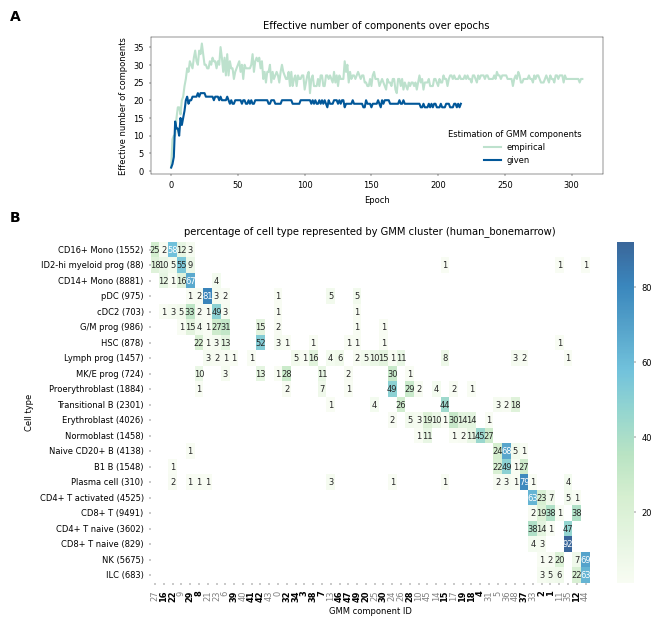

In [129]:
from omicsdgd.functions._analysis import (
    gmm_make_confusion_matrix
)
handletextpad = 0.1
legend_x_dist, legend_y_dist = -0.0, 0.0
grid_letter_positions = [-0.1, 0.05]
grid_letter_fontsize = 10
grid_letter_fontfamily = "sans-serif"
grid_letter_fontweight = "bold"

df_clustering = gmm_make_confusion_matrix(model, norm=False)
df_relative_clustering = gmm_make_confusion_matrix(model)

annotations = df_relative_clustering.to_numpy(dtype=np.float64).copy()
# reduce annotations for readability
annotations[annotations < 1] = None
df_relative_clustering = df_relative_clustering.fillna(0)
# choose color palette

fig = plt.figure(figsize=(18 * cm, 18 * cm))
gs = gridspec.GridSpec(3, 6)
gs.update(wspace=0.5, hspace=0.5)
ax0 = plt.subplot(gs[0, :5])
ax0.text(
    grid_letter_positions[0] * 3.1,
    1.0 + 2 * grid_letter_positions[1],
    "A",
    transform=ax0.transAxes,
    fontsize=grid_letter_fontsize,
    va="bottom",
    fontfamily=grid_letter_fontfamily,
    fontweight=grid_letter_fontweight,
)
ax1 = plt.subplot(gs[1:, :])
ax1.text(
    grid_letter_positions[0] * 3.2,
    1.0 + 1 * grid_letter_positions[1],
    "B",
    transform=ax1.transAxes,
    fontsize=grid_letter_fontsize,
    va="bottom",
    fontfamily=grid_letter_fontfamily,
    fontweight=grid_letter_fontweight,
)
# plot the effective number of components against epochs
sns.lineplot(
    x="epoch",
    y="value",
    hue="variable",
    palette= ["#BDE1CD", "#015799"],
    data=df_effective_components,
    ax=ax0,
)
ax0.set_ylabel("Effective number of components")
ax0.set_xlabel("Epoch")
ax0.set_title("Effective number of components over epochs")
ax0.legend(
    title="Estimation of GMM components",
    bbox_to_anchor=(0.65, 0.35),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 6,
)

cmap = sns.color_palette("GnBu", as_cmap=True)
sns.heatmap(
    df_relative_clustering,
    annot=annotations,
    # sns.heatmap(df_clustering, annot=annotations,
    cmap=cmap,
    annot_kws={"size": 6},
    mask=np.isnan(annotations),
    ax=ax1,
    alpha=0.8,
)
ylabels = [
    df_clustering.index[x] + " (" + str(int(df_clustering.sum(axis=1)[x])) + ")"
    for x in range(df_clustering.shape[0])
]
ax1.set(yticklabels=ylabels)
ax1.tick_params(axis="x", rotation=90)
ax1.set_ylabel("Cell type")
ax1.set_xlabel("GMM component ID")
# make the x ticks for the components that are not in valid components grey, and the others bold
for i in range(df_clustering.shape[1]):
    if i not in valid_components:
        ax1.get_xticklabels()[i].set_color("grey")
    else:
        ax1.get_xticklabels()[i].set_fontweight("bold")
ax1.set_title(
    "percentage of cell type represented by GMM cluster (" + data_name + ")"
)
# save the figure
fig.savefig(os.path.join(plot_path, model_name + "_clustering_confusion_matrix.png"), bbox_inches="tight", dpi=300)

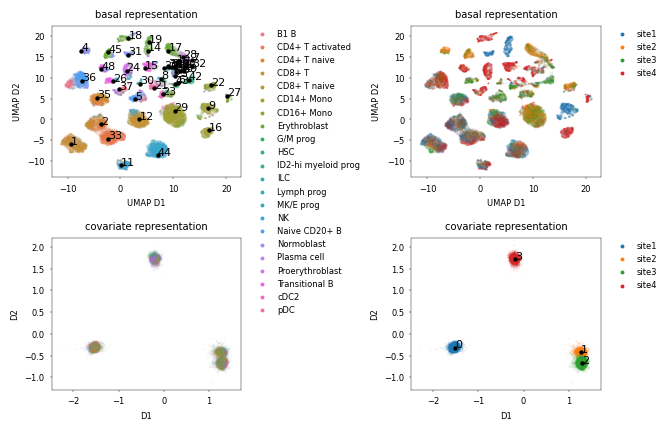

In [8]:
# make a plot with 2 subplots
fig = plt.figure(figsize=(18 * cm, 12 * cm))
gs = gridspec.GridSpec(2, 2)
# add spacing
gs.update(wspace=0.9, hspace=0.4)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
# make a umap of the representations
reducer = umap.UMAP(n_neighbors=15, min_dist=0.5)
rep = reducer.fit_transform(model.representation.z.detach().cpu().numpy())
# get the gmm means
gmm = reducer.transform(model.gmm.mean.detach().cpu().numpy())
# put the data in a dataframe so I can randomize the order
rep_df = pd.DataFrame(rep, columns=["UMAP D1", "UMAP D2"])
rep_df["cell type"] = trainset.obs["cell_type"].values
rep_df["Site"] = trainset.obs["Site"].values
rep_df = rep_df.sample(frac=1)
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="cell type",
    s=1,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
# plot the gmm means
sns.scatterplot(
    x=gmm[:, 0],
    y=gmm[:, 1],
    s=10,
    color="black",
    alpha=1,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_title("basal representation")
for j in range(gmm.shape[0]):
    ax_list[-1].text(gmm[j, 0], gmm[j, 1], str(j), fontsize=8)
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)
# same plot by covariate
ax_list.append(fig.add_subplot(gs[0, 1]))
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="Site",
    s=1,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_title("basal representation")
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)
ax_list.append(fig.add_subplot(gs[1, 1]))
sns.scatterplot(
    x=model.correction_rep.z.detach().cpu().numpy()[:, 0],
    y=model.correction_rep.z.detach().cpu().numpy()[:, 1],
    hue=trainset.obs["Site"].values,
    s=1,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
sns.scatterplot(
    x=model.correction_gmm.mean.detach().cpu().numpy()[:, 0],
    y=model.correction_gmm.mean.detach().cpu().numpy()[:, 1],
    s=10,
    color="black",
    alpha=1,
    linewidth=0,
    ax=ax_list[-1]
)
for j in range(model.correction_gmm.n_mix_comp):
    ax_list[-1].text(model.correction_gmm.mean.detach().cpu().numpy()[j, 0], model.correction_gmm.mean.detach().cpu().numpy()[j, 1], str(j), fontsize=8)
ax_list[-1].set_xlabel("D1")
ax_list[-1].set_ylabel("D2")
ax_list[-1].set_title("covariate representation")


ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)
ax_list.append(fig.add_subplot(gs[1, 0]))
sns.scatterplot(
    x=model.correction_rep.z.detach().cpu().numpy()[:, 0],
    y=model.correction_rep.z.detach().cpu().numpy()[:, 1],
    hue=trainset.obs["cell_type"].values,
    s=1,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_xlabel("D1")
ax_list[-1].set_ylabel("D2")
ax_list[-1].set_title("covariate representation")
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize).remove()
# save figure
fig.savefig(os.path.join(plot_path, model_name + "_train_representations.png"), bbox_inches="tight", dpi=300)

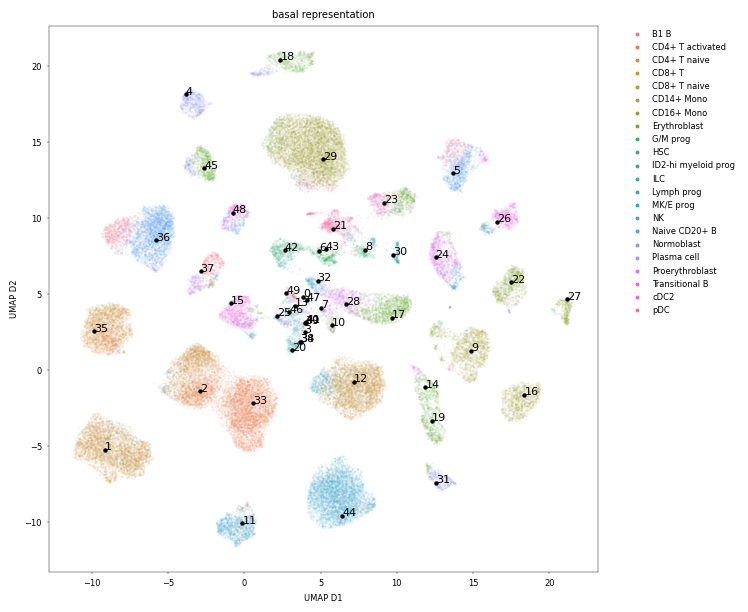

In [10]:
# make a plot with 2 subplots
fig = plt.figure(figsize=(18 * cm, 18 * cm))
gs = gridspec.GridSpec(1,1)
# add spacing
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
# make a umap of the representations
reducer = umap.UMAP(n_neighbors=15, min_dist=0.5)
rep = reducer.fit_transform(model.representation.z.detach().cpu().numpy())
# get the gmm means
gmm = reducer.transform(model.gmm.mean.detach().cpu().numpy())
# put the data in a dataframe so I can randomize the order
rep_df = pd.DataFrame(rep, columns=["UMAP D1", "UMAP D2"])
rep_df["cell type"] = trainset.obs["cell_type"].values
rep_df["Site"] = trainset.obs["Site"].values
rep_df = rep_df.sample(frac=1)
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="cell type",
    s=2,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
# plot the gmm means
sns.scatterplot(
    x=gmm[:, 0],
    y=gmm[:, 1],
    s=10,
    color="black",
    alpha=1,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_title("basal representation")
for j in range(gmm.shape[0]):
    ax_list[-1].text(gmm[j, 0], gmm[j, 1], str(j), fontsize=8)
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)

fig.savefig(os.path.join(plot_path, model_name + "_train_representations_closeup.png"), bbox_inches="tight", dpi=300)

## mosaic data

### plots

In [3]:
data_name = "human_bonemarrow"
result_path = "../results/revision/analysis/batch_integration/" + data_name + "/"
plot_path = "../results/revision/plots/" + data_name + "/"

import anndata as ad

# load data
save_dir = "../results/trained_models/"
data_name = "human_bonemarrow"
adata = ad.read_h5ad("../../data/" + data_name + ".h5ad")
adata.X = adata.layers["counts"]
df_unpaired = pd.read_csv('../../data/'+data_name+'_unpairing.csv')
train_indices = list(np.where(adata.obs["train_val_test"] == "train")[0])
test_indices = list(np.where(adata.obs["train_val_test"] == "test")[0])
trainset = adata[train_indices, :].copy()
adata = None

In [4]:
trainset.obs["modality"] = df_unpaired[df_unpaired["fraction_unpaired"] == 0.1]["modality"].values

model_name = "human_bonemarrow_l20_h2-3_rs0_mosaic0.1percent"

import torch
checkpoint = torch.load(
    save_dir + data_name + "/"  + model_name + ".pt", map_location=torch.device("cpu")
)

In [10]:
def sort_by_modality(df, column, modality_order):
    out_list = []
    for mod in modality_order:
        out_list.append(df[df["modality"] == mod][column].values)
    return np.concatenate(out_list)

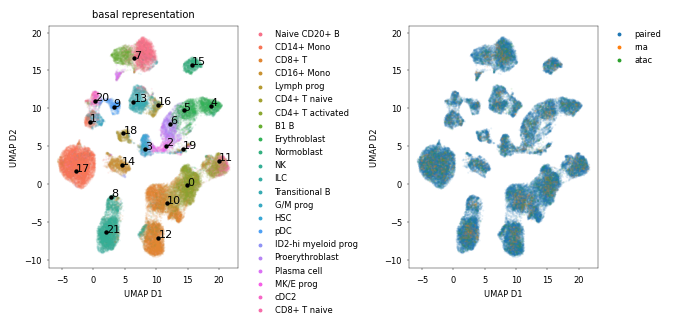

In [12]:
# make a plot with 2 subplots
fig = plt.figure(figsize=(18 * cm, 8 * cm))
gs = gridspec.GridSpec(1,2)
# add spacing
gs.update(wspace=0.9, hspace=0.4)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
# make a umap of the representations
reducer = umap.UMAP(n_neighbors=15, min_dist=0.5)
rep = reducer.fit_transform(checkpoint["representation.z"].detach().cpu().numpy())
# get the gmm means
gmm = reducer.transform(checkpoint["gmm.mean"].detach().cpu().numpy())
# put the data in a dataframe so I can randomize the order
rep_df = pd.DataFrame(rep, columns=["UMAP D1", "UMAP D2"])
# get celltypes, sites, and modalities in the order of the modality values "paired", "rna", "atac"
celltypes = sort_by_modality(trainset.obs, "cell_type", ["paired","rna","atac"])
sites = sort_by_modality(trainset.obs, "Site", ["paired","rna","atac"])
modalities = sort_by_modality(trainset.obs, "modality", ["paired","rna","atac"])
rep_df["cell type"] = celltypes
rep_df["Site"] = sites
rep_df["modality"] = modalities
#rep_df = rep_df.sample(frac=1)
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="cell type",
    s=2,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
# plot the gmm means
sns.scatterplot(
    x=gmm[:, 0],
    y=gmm[:, 1],
    s=10,
    color="black",
    alpha=1,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_title("basal representation")
for j in range(gmm.shape[0]):
    ax_list[-1].text(gmm[j, 0], gmm[j, 1], str(j), fontsize=8)
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)

ax_list.append(fig.add_subplot(gs[0, 1]))
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="modality",
    s=2,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)

fig.savefig(os.path.join(plot_path, model_name + "_train_representations_closeup.png"), bbox_inches="tight", dpi=300)

In [13]:
trainset.obs["modality"] = df_unpaired[df_unpaired["fraction_unpaired"] == 0.5]["modality"].values

model_name = "human_bonemarrow_l20_h2-3_rs0_mosaic0.5percent"

import torch
checkpoint = torch.load(
    save_dir + data_name + "/"  + model_name + ".pt", map_location=torch.device("cpu")
)

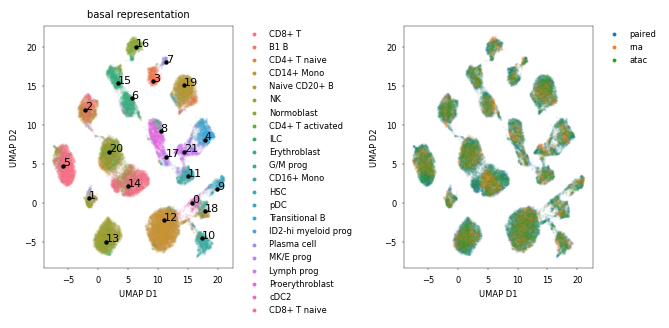

In [14]:
# make a plot with 2 subplots
fig = plt.figure(figsize=(18 * cm, 8 * cm))
gs = gridspec.GridSpec(1,2)
# add spacing
gs.update(wspace=0.9, hspace=0.4)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
# make a umap of the representations
reducer = umap.UMAP(n_neighbors=15, min_dist=0.5)
rep = reducer.fit_transform(checkpoint["representation.z"].detach().cpu().numpy())
# get the gmm means
gmm = reducer.transform(checkpoint["gmm.mean"].detach().cpu().numpy())
# put the data in a dataframe so I can randomize the order
rep_df = pd.DataFrame(rep, columns=["UMAP D1", "UMAP D2"])
# get celltypes, sites, and modalities in the order of the modality values "paired", "rna", "atac"
celltypes = sort_by_modality(trainset.obs, "cell_type", ["paired","rna","atac"])
sites = sort_by_modality(trainset.obs, "Site", ["paired","rna","atac"])
modalities = sort_by_modality(trainset.obs, "modality", ["paired","rna","atac"])
rep_df["cell type"] = celltypes
rep_df["Site"] = sites
rep_df["modality"] = modalities
#rep_df = rep_df.sample(frac=1)
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="cell type",
    s=2,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
# plot the gmm means
sns.scatterplot(
    x=gmm[:, 0],
    y=gmm[:, 1],
    s=10,
    color="black",
    alpha=1,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_title("basal representation")
for j in range(gmm.shape[0]):
    ax_list[-1].text(gmm[j, 0], gmm[j, 1], str(j), fontsize=8)
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)

ax_list.append(fig.add_subplot(gs[0, 1]))
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="modality",
    s=2,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)

fig.savefig(os.path.join(plot_path, model_name + "_train_representations_closeup.png"), bbox_inches="tight", dpi=300)

In [15]:
trainset.obs["modality"] = df_unpaired[df_unpaired["fraction_unpaired"] == 0.9]["modality"].values

model_name = "human_bonemarrow_l20_h2-3_rs0_mosaic0.9percent"

import torch
checkpoint = torch.load(
    save_dir + data_name + "/"  + model_name + ".pt", map_location=torch.device("cpu")
)

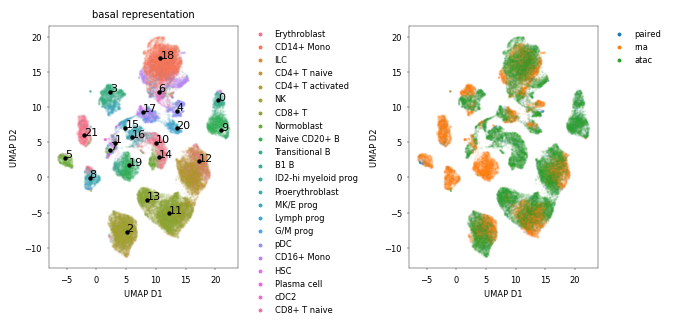

In [16]:
# make a plot with 2 subplots
fig = plt.figure(figsize=(18 * cm, 8 * cm))
gs = gridspec.GridSpec(1,2)
# add spacing
gs.update(wspace=0.9, hspace=0.4)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
# make a umap of the representations
reducer = umap.UMAP(n_neighbors=15, min_dist=0.5)
rep = reducer.fit_transform(checkpoint["representation.z"].detach().cpu().numpy())
# get the gmm means
gmm = reducer.transform(checkpoint["gmm.mean"].detach().cpu().numpy())
# put the data in a dataframe so I can randomize the order
rep_df = pd.DataFrame(rep, columns=["UMAP D1", "UMAP D2"])
# get celltypes, sites, and modalities in the order of the modality values "paired", "rna", "atac"
celltypes = sort_by_modality(trainset.obs, "cell_type", ["paired","rna","atac"])
sites = sort_by_modality(trainset.obs, "Site", ["paired","rna","atac"])
modalities = sort_by_modality(trainset.obs, "modality", ["paired","rna","atac"])
rep_df["cell type"] = celltypes
rep_df["Site"] = sites
rep_df["modality"] = modalities
#rep_df = rep_df.sample(frac=1)
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="cell type",
    s=2,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
# plot the gmm means
sns.scatterplot(
    x=gmm[:, 0],
    y=gmm[:, 1],
    s=10,
    color="black",
    alpha=1,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_title("basal representation")
for j in range(gmm.shape[0]):
    ax_list[-1].text(gmm[j, 0], gmm[j, 1], str(j), fontsize=8)
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)

ax_list.append(fig.add_subplot(gs[0, 1]))
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="modality",
    s=2,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)

fig.savefig(os.path.join(plot_path, model_name + "_train_representations_closeup.png"), bbox_inches="tight", dpi=300)

In [10]:
# load all prediction errors

data_name = "human_bonemarrow"
n_features_bm = 129921
fractions_unpaired = [0, 0.1, 0.5, 0.9]
result_path = "../results/revision/analysis/mosaic/" + data_name + "/"
plot_path = "../results/revision/plots/" + data_name + "/"

model_names = [
    "human_bonemarrow_l20_h2-3_test50e",
    "human_bonemarrow_l20_h2-3_rs0_mosaic0.1percent_test50e",
    "human_bonemarrow_l20_h2-3_rs0_mosaic0.5percent_test50e",
    "human_bonemarrow_l20_h2-3_rs0_mosaic0.9percent_test50e"
]

prediction_errors = pd.DataFrame()
for i, model_name in enumerate(model_names):
    temp_df = pd.read_csv(
        result_path
        + data_name
        + "_rs0_mosaic"
        + str(fractions_unpaired[i])
        + "_prediction_errors_supervised.csv"
    )
    temp_df["model"] = model_name
    temp_df["fraction unpaired"] = fractions_unpaired[i]
    prediction_errors = pd.concat([prediction_errors, temp_df])
prediction_errors["normalized error"] = prediction_errors["error"] / n_features_bm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


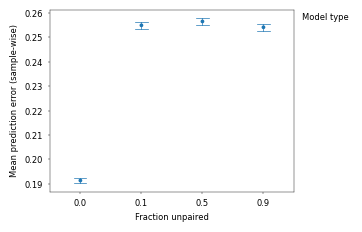

In [11]:
# plot the errors by model as point plot with standard error

# new figure
fig = plt.figure(figsize=(8 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 1)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="fraction unpaired",
    y="normalized error",
    data=prediction_errors,
    #hue="model",
    #palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("Mean prediction error (sample-wise)")
ax_list[-1].set_xlabel("Fraction unpaired")
ax_list[-1].legend(
    title="Model type",
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 2,
)
# save
fig.savefig(os.path.join(plot_path, "mosaic_performance_human_bonemarrow_prediction_errors_by_model.png"), bbox_inches="tight", dpi=300)

In [12]:
# load all prediction errors

data_name = "human_bonemarrow"
n_features_bm = 129921
fractions_unpaired = [0, 0.1, 0.5, 0.9]
result_path = "../results/revision/analysis/mosaic/" + data_name + "/"
plot_path = "../results/revision/plots/" + data_name + "/"

model_names = [
    "human_bonemarrow_l20_h2-3_test50e",
    "human_bonemarrow_l20_h2-3_rs0_mosaic0.1percent_test50e",
    "human_bonemarrow_l20_h2-3_rs0_mosaic0.5percent_test50e",
    "human_bonemarrow_l20_h2-3_rs0_mosaic0.9percent_test50e"
]

prediction_errors = pd.DataFrame()
for i, model_name in enumerate(model_names):
    temp_df = pd.read_csv(
        result_path
        + data_name
        + "_rs0_mosaic"
        + str(fractions_unpaired[i])
        + "_RMSE-BA_samplewise.csv"
    )
    temp_df["model"] = model_name
    temp_df["fraction unpaired"] = fractions_unpaired[i]
    prediction_errors = pd.concat([prediction_errors, temp_df])
#prediction_errors["normalized error"] = prediction_errors["error"] / n_features_bm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


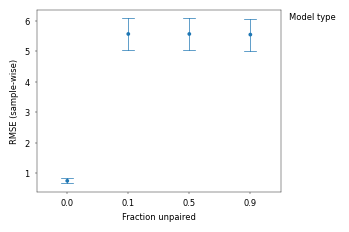

In [13]:
# plot the errors by model as point plot with standard error

# new figure
fig = plt.figure(figsize=(8 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 1)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="fraction unpaired",
    y="rmse",
    data=prediction_errors,
    #hue="model",
    #palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("RMSE (sample-wise)")
ax_list[-1].set_xlabel("Fraction unpaired")
ax_list[-1].legend(
    title="Model type",
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 2,
)
# save
fig.savefig(os.path.join(plot_path, "mosaic_performance_human_bonemarrow_RMSE_by_model.png"), bbox_inches="tight", dpi=300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


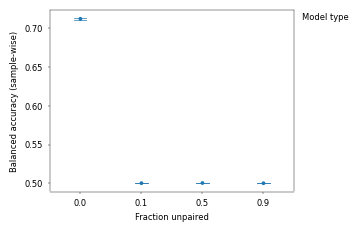

In [14]:
# plot the errors by model as point plot with standard error

# new figure
fig = plt.figure(figsize=(8 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 1)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="fraction unpaired",
    y="ba",
    data=prediction_errors,
    #hue="model",
    #palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("Balanced accuracy (sample-wise)")
ax_list[-1].set_xlabel("Fraction unpaired")
ax_list[-1].legend(
    title="Model type",
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 2,
)
# save
fig.savefig(os.path.join(plot_path, "mosaic_performance_human_bonemarrow_BA_by_model.png"), bbox_inches="tight", dpi=300)

In [15]:
# load all prediction errors

data_name = "human_bonemarrow"
n_features_bm = 129921
fractions_unpaired = [0, 0.1, 0.5, 0.9]
result_path = "../results/revision/analysis/mosaic/" + data_name + "/"
plot_path = "../results/revision/plots/" + data_name + "/"

model_names = [
    "human_bonemarrow_l20_h2-3_test50e",
    "human_bonemarrow_l20_h2-3_rs0_mosaic0.1percent_test50e",
    "human_bonemarrow_l20_h2-3_rs0_mosaic0.5percent_test50e",
    "human_bonemarrow_l20_h2-3_rs0_mosaic0.9percent_test50e"
]

prediction_errors = pd.DataFrame()
for i, model_name in enumerate(model_names):
    temp_df = pd.read_csv(
        result_path
        + data_name
        + "_rs0_mosaic"
        + str(fractions_unpaired[i])
        + "_clustering_metrics.csv"
    )
    temp_df["model"] = model_name
    temp_df["fraction unpaired"] = fractions_unpaired[i]
    prediction_errors = pd.concat([prediction_errors, temp_df])
#prediction_errors["normalized error"] = prediction_errors["error"] / n_features_bm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


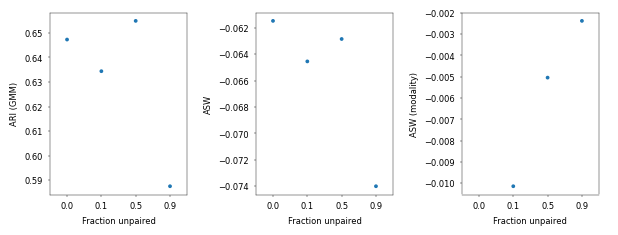

In [17]:
# plot the ARI, ASW and ASW (modality)

# new figure
fig = plt.figure(figsize=(18 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 3)
gs.update(wspace=0.5, hspace=0.5)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="fraction unpaired",
    y="ARI (GMM)",
    data=prediction_errors,
    #hue="model",
    #palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("ARI (GMM)")
ax_list[-1].set_xlabel("Fraction unpaired")
ax_list[-1].legend().remove()
ax_list.append(fig.add_subplot(gs[0, 1]))
sns.pointplot(
    x="fraction unpaired",
    y="silhouette",
    data=prediction_errors,
    #hue="model",
    #palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("ASW")
ax_list[-1].set_xlabel("Fraction unpaired")
ax_list[-1].legend().remove()
ax_list.append(fig.add_subplot(gs[0, 2]))
sns.pointplot(
    x="fraction unpaired",
    y="silhouette (modality)",
    data=prediction_errors,
    #hue="model",
    #palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("ASW (modality)")
ax_list[-1].set_xlabel("Fraction unpaired")
ax_list[-1].legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0, frameon=False, handletextpad=handletextpad * 2)
# save
fig.savefig(os.path.join(plot_path, "mosaic_performance_human_bonemarrow_clustering_metrics_by_model.png"), bbox_inches="tight", dpi=300)

### look at prediction

In [1]:
import anndata as ad
import pandas as pd
import numpy as np
from omicsdgd import DGD

In [2]:
###
# load data
###
data_name = "human_bonemarrow"
adata = ad.read_h5ad("../../data/" + data_name + ".h5ad")
adata.X = adata.layers["counts"] # I seem to have to do it again

# train-validation-test split for reproducibility
# best provided as list [[train_indices], [validation_indices]]
train_val_split = [
    list(np.where(adata.obs["train_val_test"] == "train")[0]),
    list(np.where(adata.obs["train_val_test"] == "validation")[0]),
]

valset = adata[adata.obs["train_val_test"] == "validation"].copy()
valset.obs["modality"] = "paired"
testset = adata[adata.obs["train_val_test"] == "test"].copy()
testset.obs["modality"] = "paired"

In [3]:
fraction_unpaired = 0.1
random_seed = 0

In [4]:
adata

AnnData object with n_obs × n_vars = 69249 × 129921
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'train_val_test', 'observable', 'covariate_Site'
    var: 'feature_types', 'gene_id', 'modality'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [5]:
testset

AnnData object with n_obs × n_vars = 6925 × 129921
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'train_val_test', 'observable', 'covariate_Site', 'modality'
    var: 'feature_types', 'gene_id', 'modality'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [6]:
import os
df_unpaired = pd.read_csv('../../data/'+data_name+'_unpairing.csv')

In [7]:
mod_1_indices = df_unpaired[
    (df_unpaired["fraction_unpaired"] == fraction_unpaired) & (df_unpaired["modality"] == "rna")
]["sample_idx"].values
mod_2_indices = df_unpaired[
    (df_unpaired["fraction_unpaired"] == fraction_unpaired) & (df_unpaired["modality"] == "atac")
]["sample_idx"].values
remaining_indices = df_unpaired[
    (df_unpaired["fraction_unpaired"] == fraction_unpaired) & (df_unpaired["modality"] == "paired")
]["sample_idx"].values

var_before = adata.var.copy()
print(var_before)
    

                        feature_types          gene_id modality
AL627309.5                        GEX  ENSG00000241860      GEX
LINC01409                         GEX  ENSG00000237491      GEX
LINC01128                         GEX  ENSG00000228794      GEX
NOC2L                             GEX  ENSG00000188976      GEX
KLHL17                            GEX  ENSG00000187961      GEX
...                               ...              ...      ...
GL000219.1-90062-90937           ATAC              NaN     ATAC
GL000219.1-99257-100160          ATAC              NaN     ATAC
KI270726.1-27152-28034           ATAC              NaN     ATAC
KI270713.1-21434-22336           ATAC              NaN     ATAC
KI270713.1-29629-30491           ATAC              NaN     ATAC

[129921 rows x 3 columns]


In [10]:
adata_rna = adata[mod_1_indices, adata.var["feature_types"] == "GEX"].copy()
adata_rna.obs["modality"] = "GEX"
print("copied rna")
adata_atac = adata[mod_2_indices, adata.var["feature_types"] == "ATAC"].copy()
adata_atac.obs["modality"] = "ATAC"
print("copied atac")
adata_multi = adata[remaining_indices, :].copy()
adata_multi.obs["modality"] = "paired"
print("copied rest")
adata = None
print("freed some memory")
adata_unpaired = ad.concat([adata_multi, adata_rna, adata_atac], join="outer")
print("organized data")

copied rna
copied atac
copied rest
freed some memory


: 

In [ ]:
# count the number of categories in "modality"
print(adata_unpaired.obs["modality"].value_counts())

KeyError: 'modality'

In [ ]:
adata_rna, adata_atac, adata_multi = None, None, None
print("freed memory")
#adata = adata_unpaired.concatenate(valset)
adata = ad.concat([adata_unpaired, valset], join="inner")
print("finished data")
adata.var = var_before

In [ ]:
train_val_split = [
    list(np.where(adata.obs["train_val_test"] == "train")[0]),
    list(np.where(adata.obs["train_val_test"] == "validation")[0]),
]

In [ ]:
model = DGD.load(
    data=adata[train_val_split[0]], 
    save_dir="../results/trained_models/" + data_name + "/", 
    model_name=data_name + "_l20_h2-3_rs" + str(random_seed)+"_mosaic"+str(fraction_unpaired)+"percent"
)

In [ ]:
original_name = model._model_name
# change the model name (because we did inference once for 10 epochs and once for 50)
model._model_name = original_name + "_test10e"
model.predict_new(testset)
print("   test set inferred")

## no covariate model

### bone marrow

In [3]:
data_name = "human_bonemarrow"
result_path = "../results/revision/analysis/batch_integration/" + data_name + "/"
plot_path = "../results/revision/plots/" + data_name + "/"

import anndata as ad

# load data
save_dir = "../results/trained_models/"
data_name = "human_bonemarrow"
adata = ad.read_h5ad("../../data/" + data_name + ".h5ad")
adata.X = adata.layers["counts"]
train_indices = list(np.where(adata.obs["train_val_test"] == "train")[0])
test_indices = list(np.where(adata.obs["train_val_test"] == "test")[0])
trainset = adata[train_indices, :].copy()
adata = None

In [4]:
model_name = "human_bonemarrow_l20_h2-3_rs0_noCovariate"

from omicsdgd import DGD
model = DGD.load(
    data=trainset, save_dir=save_dir + data_name + "/", model_name=model_name
)

CUDA Available: False
Number of GPUs: 0
using device:  cpu
printing all checkpoint keys containing 'correction'
#######################
Training status
#######################
True


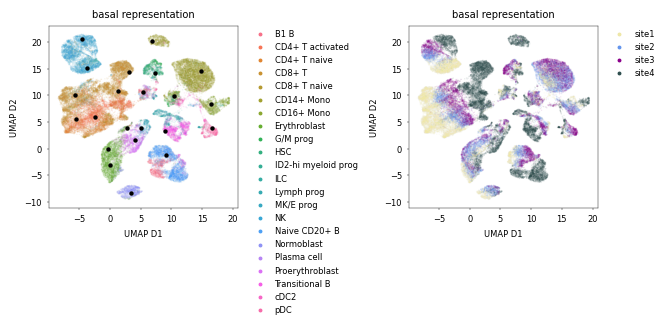

In [5]:
# make a plot with 2 subplots
fig = plt.figure(figsize=(18 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 2)
# add spacing
gs.update(wspace=0.9, hspace=0.4)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
# make a umap of the representations
reducer = umap.UMAP(n_neighbors=15, min_dist=0.5)
rep = reducer.fit_transform(model.representation.z.detach().cpu().numpy())
# get the gmm means
gmm = reducer.transform(model.gmm.mean.detach().cpu().numpy())
# put the data in a dataframe so I can randomize the order
rep_df = pd.DataFrame(rep, columns=["UMAP D1", "UMAP D2"])
rep_df["cell type"] = trainset.obs["cell_type"].values
rep_df["Site"] = trainset.obs["Site"].values
rep_df = rep_df.sample(frac=1)
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="cell type",
    s=1,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
# plot the gmm means
sns.scatterplot(
    x=gmm[:, 0],
    y=gmm[:, 1],
    s=10,
    color="black",
    alpha=1,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_title("basal representation")
#for j in range(gmm.shape[0]):
#    ax_list[-1].text(gmm[j, 0], gmm[j, 1], str(j), fontsize=8)
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)
# same plot by covariate
ax_list.append(fig.add_subplot(gs[0, 1]))
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="Site",
    palette=batch_palette,
    s=1,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_title("basal representation")
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)

# save figure
fig.savefig(os.path.join(plot_path, model_name + "_train_representations.png"), bbox_inches="tight", dpi=600)

In [6]:
model = None

In [7]:
model_name = "human_bonemarrow_l20_h2-3"

from omicsdgd import DGD
model = DGD.load(
    data=trainset, save_dir=save_dir + data_name + "/", model_name=model_name
)

CUDA Available: False
Number of GPUs: 0
using device:  cpu

        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 4
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
correction_test_rep.z
#######################
Training status
#######################
True


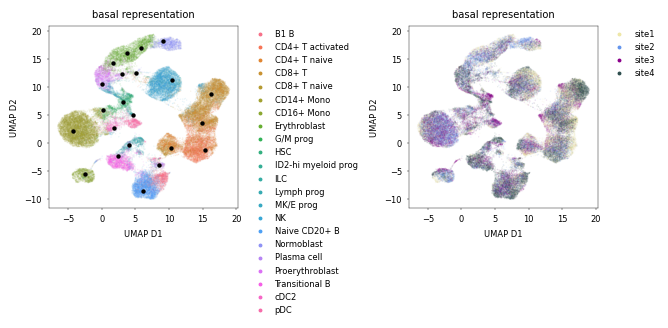

In [8]:
# make a plot with 2 subplots
fig = plt.figure(figsize=(18 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 2)
# add spacing
gs.update(wspace=0.9, hspace=0.4)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
# make a umap of the representations
reducer = umap.UMAP(n_neighbors=15, min_dist=0.5)
rep = reducer.fit_transform(model.representation.z.detach().cpu().numpy())
# get the gmm means
gmm = reducer.transform(model.gmm.mean.detach().cpu().numpy())
# put the data in a dataframe so I can randomize the order
rep_df = pd.DataFrame(rep, columns=["UMAP D1", "UMAP D2"])
rep_df["cell type"] = trainset.obs["cell_type"].values
rep_df["Site"] = trainset.obs["Site"].values
rep_df = rep_df.sample(frac=1)
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="cell type",
    s=1,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
# plot the gmm means
sns.scatterplot(
    x=gmm[:, 0],
    y=gmm[:, 1],
    s=10,
    color="black",
    alpha=1,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_title("basal representation")
#for j in range(gmm.shape[0]):
#    ax_list[-1].text(gmm[j, 0], gmm[j, 1], str(j), fontsize=8)
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)
# same plot by covariate
ax_list.append(fig.add_subplot(gs[0, 1]))
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="Site",
    palette=batch_palette,
    s=1,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_title("basal representation")
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)

# save figure
fig.savefig(os.path.join(plot_path, model_name + "_train_representations.png"), bbox_inches="tight", dpi=600)

### mouse gastrulation

In [3]:
import mudata as md

data_name = "mouse_gastrulation"
data = md.read("../../data/mouse_gastrulation.h5mu", backed=False)

# load data
save_dir = "../results/trained_models/"
train_indices = list(np.where(data.obs["train_val_test"] == "train")[0])
test_indices = list(np.where(data.obs["train_val_test"] == "test")[0])
trainset = data[train_indices, :].copy()

data = None

In [4]:
model_name = "mouse_gast_l20_h2-2_rs0"

from omicsdgd import DGD
model = DGD.load(
    data=trainset, save_dir=save_dir + data_name + "/", model_name=model_name
)

cov_name = "stage"
ct_name = "celltype"

CUDA Available: False
Number of GPUs: 0
using device:  cpu

        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 5
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
correction_test_rep.z
#######################
Training status
#######################
True


In [5]:
# make a umap of the representations
reducer = umap.UMAP(n_neighbors=15, min_dist=1.0)
rep = reducer.fit_transform(model.representation.z.detach().cpu().numpy())
# get the gmm means
gmm = reducer.transform(model.gmm.mean.detach().cpu().numpy())
# put the data in a dataframe so I can randomize the order
rep_df = pd.DataFrame(rep, columns=["UMAP D1", "UMAP D2"])
rep_df["cell type"] = trainset.obs[ct_name].values
rep_df[cov_name] = trainset.obs[cov_name].values
rep_df = rep_df.sample(frac=1)

python(67457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_67046/2203803344.py:11: UserWarning: The palette list has more values (256) than needed (37), which may not be intended.
  sns.scatterplot(


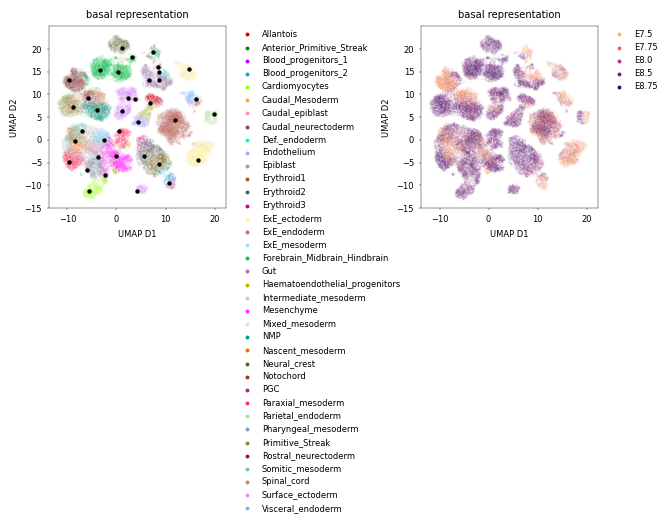

In [7]:
import colorcet as cc

# make a plot with 2 subplots
fig = plt.figure(figsize=(18 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 2)
# add spacing
gs.update(wspace=1.1, hspace=0.4)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))

sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="cell type",
    palette=cc.glasbey_light,
    s=1,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
# plot the gmm means
sns.scatterplot(
    x=gmm[:, 0],
    y=gmm[:, 1],
    s=10,
    color="black",
    alpha=1,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_title("basal representation")
#for j in range(gmm.shape[0]):
#    ax_list[-1].text(gmm[j, 0], gmm[j, 1], str(j), fontsize=8)
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)
# same plot by covariate
ax_list.append(fig.add_subplot(gs[0, 1]))
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue=cov_name,
    palette=stage_palette,
    s=1,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_title("basal representation")
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)

# save figure
fig.savefig(os.path.join(plot_dir, model_name + "_train_representations.png"), bbox_inches="tight", dpi=600)

In [6]:
# make a umap of the representations
reducer = umap.UMAP(n_neighbors=15, min_dist=1.0)
import torch
rep_full = torch.concat([model.representation.z.detach().cpu(), model.correction_rep.z.detach().cpu()], dim=1).numpy()
# check if the shape is correct
print(rep_full.shape)
rep = reducer.fit_transform(rep_full)
rep_df = pd.DataFrame(rep, columns=["UMAP D1", "UMAP D2"])
rep_df["cell type"] = trainset.obs[ct_name].values
rep_df[cov_name] = trainset.obs[cov_name].values
rep_df = rep_df.sample(frac=1)

(45489, 22)


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_68633/568605692.py:11: UserWarning: The palette list has more values (256) than needed (37), which may not be intended.
  sns.scatterplot(


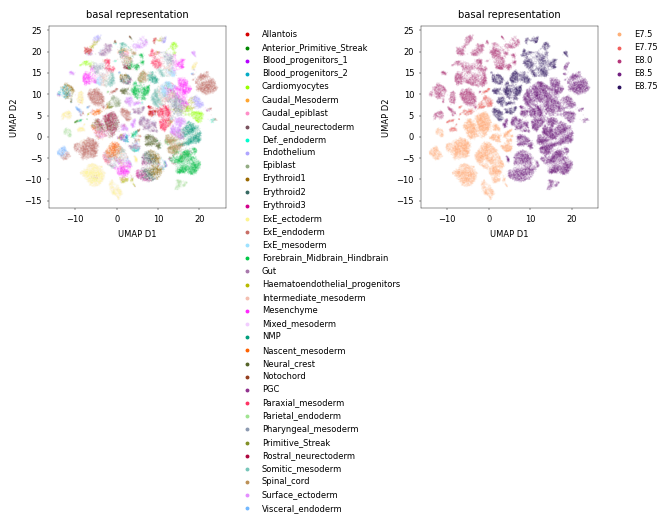

In [7]:
import colorcet as cc

# make a plot with 2 subplots
fig = plt.figure(figsize=(18 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 2)
# add spacing
gs.update(wspace=1.1, hspace=0.4)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))

sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="cell type",
    palette=cc.glasbey_light,
    s=1,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_title("basal representation")
#for j in range(gmm.shape[0]):
#    ax_list[-1].text(gmm[j, 0], gmm[j, 1], str(j), fontsize=8)
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)
# same plot by covariate
ax_list.append(fig.add_subplot(gs[0, 1]))
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue=cov_name,
    palette=stage_palette,
    s=1,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_title("basal representation")
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)

# save figure
fig.savefig(os.path.join(plot_dir, model_name + "_train_representations_noseparation.png"), bbox_inches="tight", dpi=600)

In [8]:
model = None

In [9]:
model_name = "mouse_gast_l20_h2-2_rs0_noCovariate"

from omicsdgd import DGD
model = DGD.load(
    data=trainset, save_dir=save_dir + data_name + "/", model_name=model_name
)

CUDA Available: False
Number of GPUs: 0
using device:  cpu
printing all checkpoint keys containing 'correction'
#######################
Training status
#######################
True


In [10]:
# make a umap of the representations
reducer = umap.UMAP(n_neighbors=15, min_dist=1.0)
rep = reducer.fit_transform(model.representation.z.detach().cpu().numpy())
# get the gmm means
gmm = reducer.transform(model.gmm.mean.detach().cpu().numpy())
# put the data in a dataframe so I can randomize the order
rep_df = pd.DataFrame(rep, columns=["UMAP D1", "UMAP D2"])
rep_df["cell type"] = trainset.obs[ct_name].values
rep_df[cov_name] = trainset.obs[cov_name].values
rep_df = rep_df.sample(frac=1)

/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_67046/2203803344.py:11: UserWarning: The palette list has more values (256) than needed (37), which may not be intended.
  sns.scatterplot(


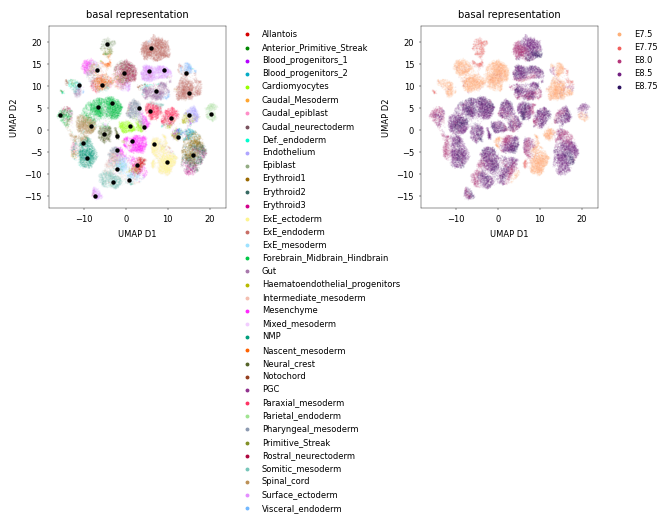

In [11]:
import colorcet as cc

# make a plot with 2 subplots
fig = plt.figure(figsize=(18 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 2)
# add spacing
gs.update(wspace=1.1, hspace=0.4)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))

sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="cell type",
    palette=cc.glasbey_light,
    s=1,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
# plot the gmm means
sns.scatterplot(
    x=gmm[:, 0],
    y=gmm[:, 1],
    s=10,
    color="black",
    alpha=1,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_title("basal representation")
#for j in range(gmm.shape[0]):
#    ax_list[-1].text(gmm[j, 0], gmm[j, 1], str(j), fontsize=8)
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)
# same plot by covariate
ax_list.append(fig.add_subplot(gs[0, 1]))
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue=cov_name,
    palette=stage_palette,
    s=1,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_title("basal representation")
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)

# save figure
fig.savefig(os.path.join(plot_dir, model_name + "_train_representations.png"), bbox_inches="tight", dpi=600)